# Giovanni Facchinetti - 18202941

# Data Understanding and Preparation

In this section, we begin with exploring the relationships between feature pairs. Then we select and (if necessary) transform the promising features based the training subset of the data.

## Import required packages
We import the packages required for the first notebook section.
In particular, we will need the following libraries:
- **Pandas**
- **Numpy**
- **Matplotlib**
- **Seaborn**
- **Sklearn**
- **Patsy**

We also hide iPykernel warnings, in order to make the cells output less verbose.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from patsy import dmatrices

# Hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read the data
We import the original dataset after it has been **properly cleaned** and the **new features** have been added.

In [2]:
# Read data from csv file and use pandas to store it to a dataframe object
df = pd.read_csv('CreditRisk-18202941_1-3_cleaned_new_features.csv', keep_default_na = True, sep = ',\s+', delimiter = ',', skipinitialspace = True)

### Get a glimpse of the data

In [3]:
# Print number of rows and columns
print("The dataset has %s rows and %s columns." % df.shape)

The dataset has 822 rows and 29 columns.


After acknowledging the size of our dataset, we note that:
- the **number of rows** is reduced from our data preparation step (we have removed inconsistent rows)
- the **number of columns** has increased since we added new features.

In [4]:
# Show first 5 rows
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
0,Good,71,308.0,7,104,39,0,0,98,73.0,...,99.0,11,1,5.0,81,0.156006,True,False,98.0,32
1,Good,75,381.0,15,108,20,0,0,95,14.0,...,64.0,6,4,3.0,77,0.156006,True,False,100.0,15
2,Bad,58,216.0,12,86,23,0,0,88,3.0,...,NaN,7,1,5.0,75,0.531915,True,True,43.0,39
3,Bad,73,191.0,17,53,19,0,0,100,122.0,...,78.0,4,3,1.0,54,0.156006,False,False,95.0,10
4,Good,89,280.0,23,107,16,0,0,100,122.0,...,38.0,1,2,0.0,60,0.156006,False,False,100.0,9


### Drop unnecessary columns
As we can note, the column 'percent' is not necessary in our dataset, as it was used to draw bar plots in the Data Preparation phase. It can be dropped.

In [5]:
df.drop('percent', axis=1, inplace=True)
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
0,Good,71,308.0,7,104,39,0,0,98,73.0,...,75,99.0,11,1,5.0,81,True,False,98.0,32
1,Good,75,381.0,15,108,20,0,0,95,14.0,...,32,64.0,6,4,3.0,77,True,False,100.0,15
2,Bad,58,216.0,12,86,23,0,0,88,3.0,...,84,NaN,7,1,5.0,75,True,True,43.0,39
3,Bad,73,191.0,17,53,19,0,0,100,122.0,...,31,78.0,4,3,1.0,54,False,False,95.0,10
4,Good,89,280.0,23,107,16,0,0,100,122.0,...,7,38.0,1,2,0.0,60,False,False,100.0,9


## Row shuffling - dataset split
In order to build our models, we need to split the cleaned dataset in two portions. We use the **sklearn** library in order to make the split random, by shuffling the rows.
- 70% of the rows will be used for **model training**
- 30% of the rows will be used for **model testing**.

We keep the test set aside for now. 

In [6]:
# Split the original dataframe - test_size is the selected portion of test
df_train, df_test = train_test_split(df, test_size = 0.3)

# Show train and test portions size
print("The original dataset has %s rows and %s columns.\n" % df.shape)
print("The train selection of the dataset has %s rows and %s columns." % df_train.shape)
print("The test selection of the dataset has %s rows and %s columns." % df_test.shape)

The original dataset has 822 rows and 28 columns.

The train selection of the dataset has 575 rows and 28 columns.
The test selection of the dataset has 247 rows and 28 columns.


The number of columns is the same for the splitted datasets, that means that we have not altered the original features. To perform a further check, we preview the first rows of the training data.<br>
**N.B.**: note row IDs, they should have been randomly shuffled.

In [7]:
df_train.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
154,Bad,65,116.0,3,39,22,0,0,95,15.0,...,50,47.0,5,4,1.0,69,True,False,100.0,15
270,Bad,65,106.0,5,42,11,1,0,92,22.0,...,60,NaN,4,1,1.0,83,True,False,85.0,10
330,Bad,77,131.0,3,76,23,0,0,100,122.0,...,19,NaN,6,2,0.0,44,False,False,96.0,10
429,Bad,55,127.0,9,60,28,2,0,80,7.0,...,69,142.0,7,9,1.0,89,True,True,93.0,26
294,Bad,60,410.0,7,124,29,0,0,97,20.0,...,70,56.0,10,4,3.0,83,True,False,91.0,26


## Feature types
First of all, we need to check if **feature types** are appropriate after having created the dataframe object from an external csv source.

In [8]:
df_train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                 float64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                  float64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

We note that Python set continuous types to categorical features:
- **MaxDelq2PublicRecLast12M** (int64)
- **MaxDelqEver** (int64)
- **DelqEver** (bool)
- **DelqLast12M** (bool)

Therefore, we need to convert them back to categorical types.
Moreover, our target feature **RiskPerformance** type (object) needs to be converted to categorical as well.

In [9]:
# Select columns containing categorical data
train_categorical = df_train[['MaxDelq2PublicRecLast12M','MaxDelqEver','RiskPerformance', 'DelqEver', 'DelqLast12M']].columns

# Convert data type to category for these columns
for column in train_categorical:
    df_train[column] = df_train[column].astype('category')  

# Select continuous features columns
train_continuous = df_train.select_dtypes(include = ['int64', 'float64'])

# Check feature types
df_train.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [10]:
# Check continuous features
train_continuous.dtypes

ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                 float64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                  float64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance                int64
NumBank2NatlTradesWHighUtilization    float64
PercentTradesWBalance                   int64
PercentSatisfactoryTrades         

## Continuous features analysis
From the **train dataset** portion, we analyse the correlations between all the **continuous features**.

### Correlation matrix
To get a visual glance between all the continuous features **in our train dataset**, we build a **correlation matrix** involving each pair.<br>
The features appear on X- and Y-axis.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text xticklabel objects>)

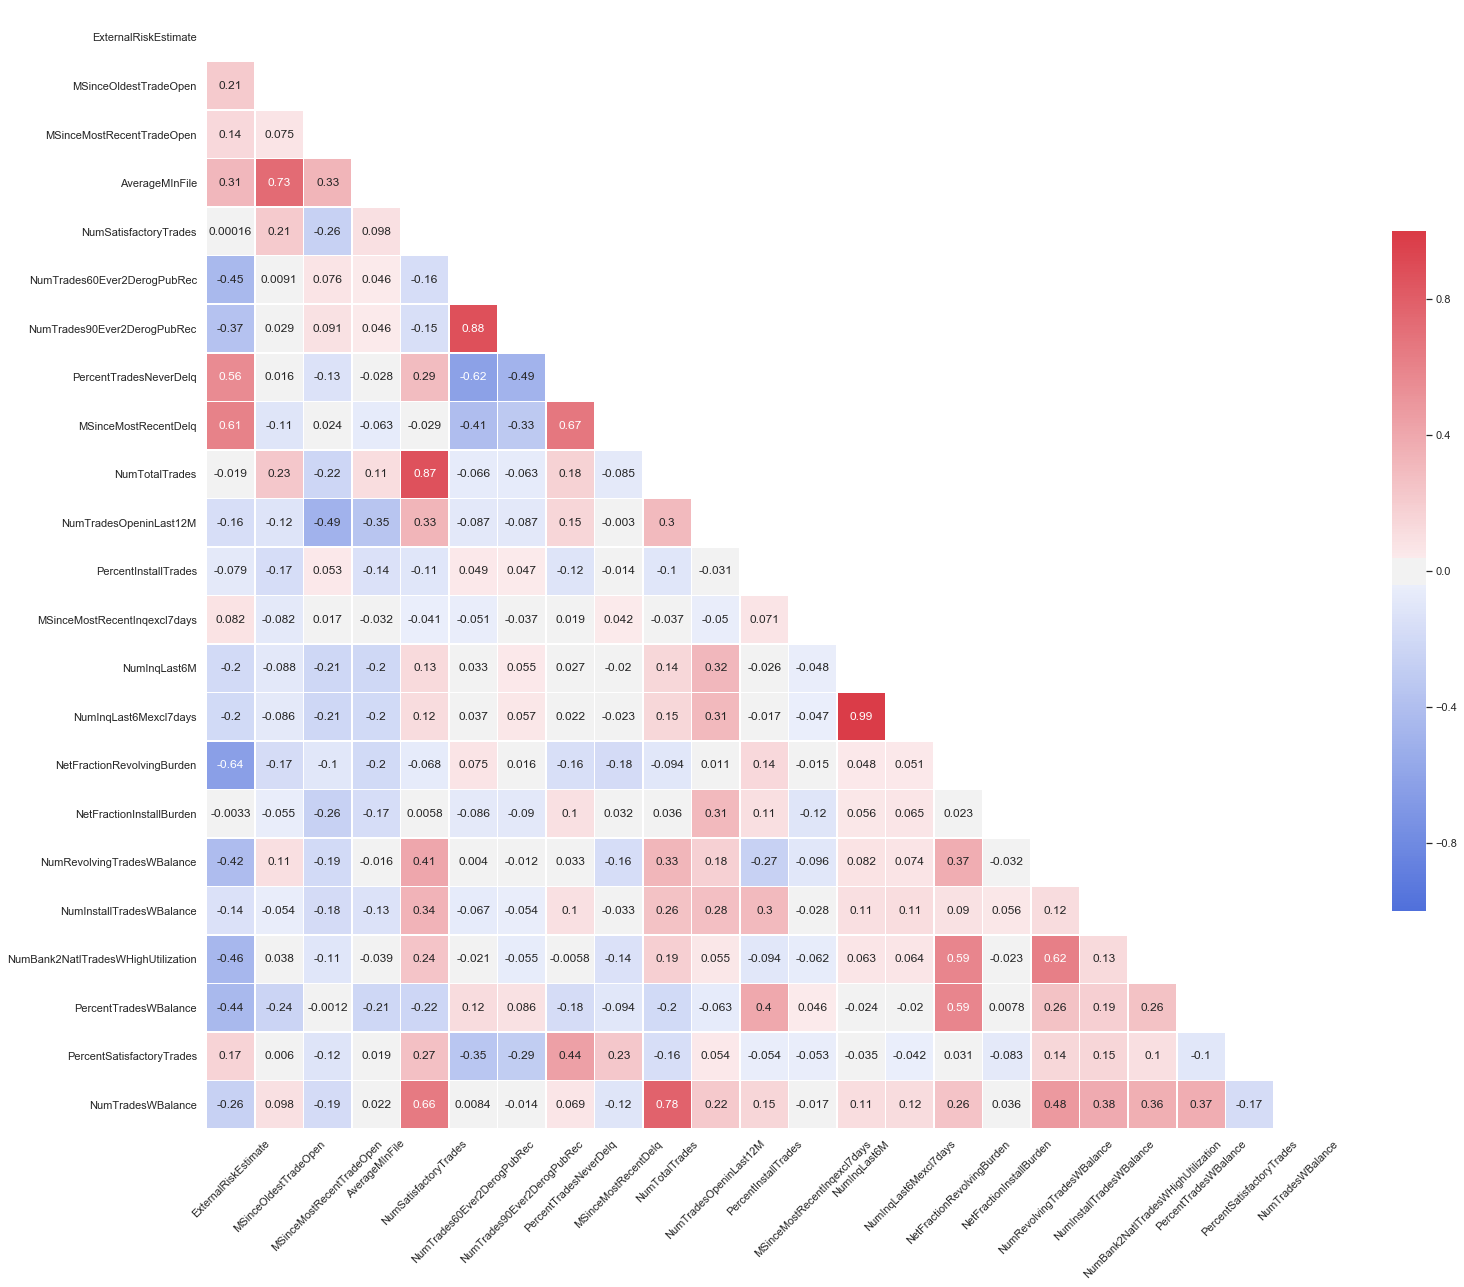

In [11]:
# Use Seaborn library
sns.set(style = "white")

# Get correlation of all continuous features pairs
corr = train_continuous.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (25, 25))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(260, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask = mask, cmap = cmap, vmax = 1, vmin = -1,
            square = True, xticklabels = True, yticklabels = True,
            linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Each square in the matrix represents the correlation between two continuous features. The number appearing centered in each square is the correlation measure between the two. The darker the square color, the stronger the correlation (either positive or negative).<br>

**Correlation range is [-1, +1]**: a correlation close to zero means that between the features there is very little or no correlation at all. A correlation close to -1 or 1 means that there is respectively a strong negative or positive correlation.<br>

The source
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression
states that correlation ranges:
- [0-0.2) indicates very weak correlation between a pair of features
- [0.2-0.4) indicates weak correlation
- [0.40-0.6) indicates moderate correlation
- [0.6-0.8) indicates a strong correlation
- [0.8-1] is a symptom of very strong correlation

**N.B.**: we will not analyse covariance - another correlation measure - since correlation is meaningful enough, i.e. a normalised form of covariance.<br>

By looking at the chart above, we can notice that several darker squares are present, indicating some **relevant correlations between continuous features** in our (train) dataset.
As we can see, the number of continuous features considered is sizeable, so it might be worth **reducing our scope of analysis** only to the features showing a "high enough" correlation index (i.e. thresholding features with a correlation >= 0.5, moderate to strong).

### Correlation measures
We focus on the strongest relationships between continuous features, still considering the Pearson correlation measure.<br>
We select **only continuous features that show a correlation greater than 0.5** between each other, by thresholding correlation for each pair.<br>
In the cell below, we list all the pairs of continuous features characterised by relevant correlations along with their correlation measure (including the correlation sign). To do that, we extract values from the **correlation matrix** between continuous features.<br>

**N.B.**: to threshold correlation we consider absolute values, so that we include negative numbers

In [12]:
# Show correlation matrix between continuous features
corr

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,1.000000,0.214292,0.138761,0.314765,0.000164,-0.445281,-0.373811,0.559779,0.607296,-0.018500,...,-0.195251,-0.195827,-0.635346,-0.003265,-0.416811,-0.140478,-0.459858,-0.442343,0.168708,-0.260354
MSinceOldestTradeOpen,0.214292,1.000000,0.075389,0.730748,0.212845,0.009078,0.028823,0.016323,-0.110822,0.230840,...,-0.088277,-0.085765,-0.174116,-0.054660,0.107787,-0.053801,0.038494,-0.240186,0.006022,0.098350
MSinceMostRecentTradeOpen,0.138761,0.075389,1.000000,0.330929,-0.259072,0.075727,0.091452,-0.125313,0.023787,-0.222826,...,-0.211959,-0.211317,-0.100177,-0.259265,-0.191641,-0.182417,-0.107379,-0.001154,-0.121298,-0.186079
AverageMInFile,0.314765,0.730748,0.330929,1.000000,0.097852,0.045981,0.046365,-0.027565,-0.062607,0.109845,...,-0.203823,-0.196782,-0.196824,-0.167109,-0.015921,-0.127986,-0.038736,-0.212641,0.019143,0.021947
NumSatisfactoryTrades,0.000164,0.212845,-0.259072,0.097852,1.000000,-0.164482,-0.148458,0.289289,-0.029049,0.870153,...,0.125366,0.121417,-0.067755,0.005777,0.406339,0.339847,0.242805,-0.219174,0.271428,0.656086
NumTrades60Ever2DerogPubRec,-0.445281,0.009078,0.075727,0.045981,-0.164482,1.000000,0.882794,-0.623964,-0.413370,-0.066119,...,0.033412,0.036736,0.075122,-0.085780,0.003986,-0.066684,-0.020956,0.119367,-0.346154,0.008357
NumTrades90Ever2DerogPubRec,-0.373811,0.028823,0.091452,0.046365,-0.148458,0.882794,1.000000,-0.488696,-0.326487,-0.062918,...,0.054559,0.056660,0.015638,-0.090015,-0.012292,-0.053644,-0.055423,0.086048,-0.294386,-0.013735
PercentTradesNeverDelq,0.559779,0.016323,-0.125313,-0.027565,0.289289,-0.623964,-0.488696,1.000000,0.670290,0.177963,...,0.026899,0.022227,-0.155526,0.101139,0.032858,0.101425,-0.005847,-0.178343,0.440009,0.068652
MSinceMostRecentDelq,0.607296,-0.110822,0.023787,-0.062607,-0.029049,-0.413370,-0.326487,0.670290,1.000000,-0.084565,...,-0.020034,-0.022818,-0.183181,0.032321,-0.164263,-0.033283,-0.138014,-0.094112,0.233575,-0.116205
NumTotalTrades,-0.018500,0.230840,-0.222826,0.109845,0.870153,-0.066119,-0.062918,0.177963,-0.084565,1.000000,...,0.144136,0.145122,-0.094305,0.036381,0.325032,0.260942,0.190101,-0.196551,-0.160292,0.777760


In [13]:
# Correlation matrix has already been stored in variable 'corr' in previous cells
# Create list to store all thresholded correlation pairs
corr_list = []

# Create list to store features involved
selection = []
# Create list to store feature pairs in tuples - to build scatter plots
col_pair = []

# Iterate over correlation matrix to threshold relevant correlations
for i in range(len(corr.columns)):
    for j in range(i):
        # Consider absolute values, set threshold value
        if (abs(corr.iloc[i, j]) >= 0.5):
            corr_list.append((corr.columns[i],corr.columns[j] , corr.iloc[i, j], abs(corr.iloc[i, j])))
            col_pair.append((corr.columns[i],corr.columns[j]))
            if corr.columns[i] not in selection and corr.columns[j] not in selection:
                selection.append(corr.columns[i])
                selection.append(corr.columns[j])

# Sort absolute correlation values in descending order
corr_list.sort(key = lambda r:r[3], reverse = True)

# Show relevant correlations
print("Number of relevant correlation pairs: %i\n" % len(corr_list))
for elem in corr_list:
    print('{:+.4f}'.format(elem[2]) + " = corr between:")
    print("\t* " + elem[0])
    print("\t* " + elem[1])

Number of relevant correlation pairs: 14

+0.9916 = corr between:
	* NumInqLast6Mexcl7days
	* NumInqLast6M
+0.8828 = corr between:
	* NumTrades90Ever2DerogPubRec
	* NumTrades60Ever2DerogPubRec
+0.8702 = corr between:
	* NumTotalTrades
	* NumSatisfactoryTrades
+0.7778 = corr between:
	* NumTradesWBalance
	* NumTotalTrades
+0.7307 = corr between:
	* AverageMInFile
	* MSinceOldestTradeOpen
+0.6703 = corr between:
	* MSinceMostRecentDelq
	* PercentTradesNeverDelq
+0.6561 = corr between:
	* NumTradesWBalance
	* NumSatisfactoryTrades
-0.6353 = corr between:
	* NetFractionRevolvingBurden
	* ExternalRiskEstimate
-0.6240 = corr between:
	* PercentTradesNeverDelq
	* NumTrades60Ever2DerogPubRec
+0.6227 = corr between:
	* NumBank2NatlTradesWHighUtilization
	* NumRevolvingTradesWBalance
+0.6073 = corr between:
	* MSinceMostRecentDelq
	* ExternalRiskEstimate
+0.5915 = corr between:
	* PercentTradesWBalance
	* NetFractionRevolvingBurden
+0.5913 = corr between:
	* NumBank2NatlTradesWHighUtilization
	*

We can notice that there are **14 pairs** of continuous features showing an "absolute" correlation value of at least 0.5. We can provide a better visualisation of the selected continuous features correlation.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

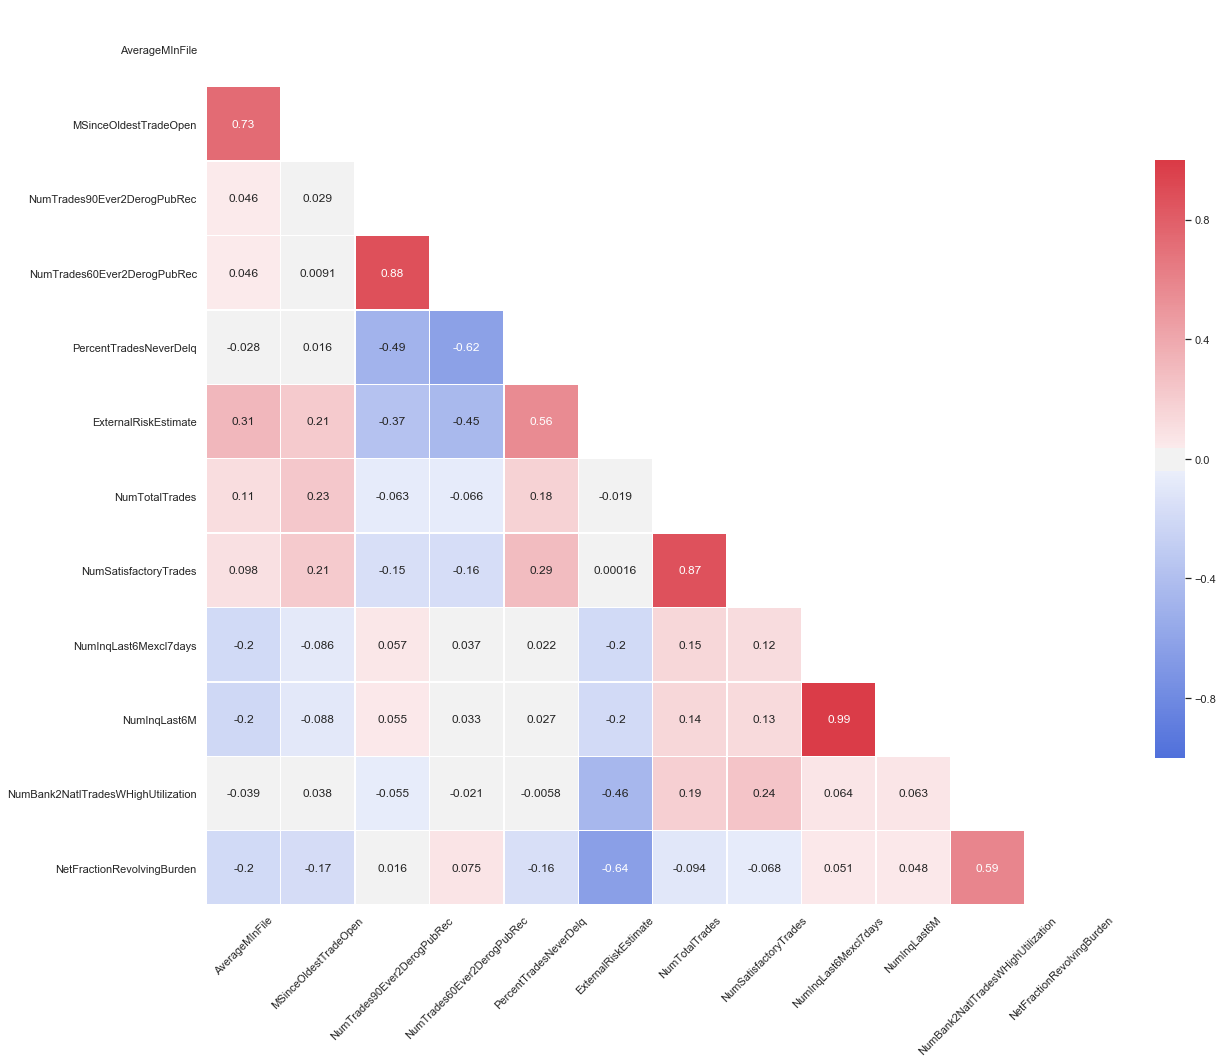

In [17]:
# Store thresholded correlations in a variable
train_continuous_selection = train_continuous[selection]
# Calculate correlation of all pairs of continuous features
corr_selection = train_continuous_selection.corr()

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style = "white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_selection, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20, 22))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(260, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_selection, annot = True, mask = mask, cmap = cmap, vmax = 1, vmin = -1,
            square = True, xticklabels = True, yticklabels = True,
            linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

### Scatter plots
To get a visual glance between all the continuous features **in our train dataset**, we build a **scatter plot** involving each pair.<br>
The feature pairs are recognizable in X- and Y-axis of each single scatter plot.

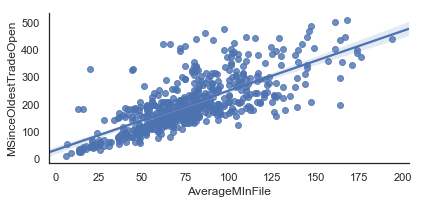

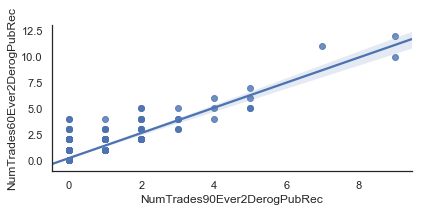

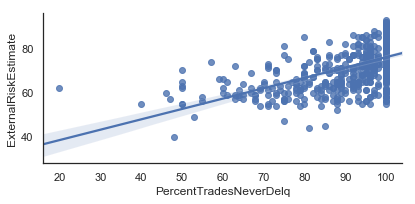

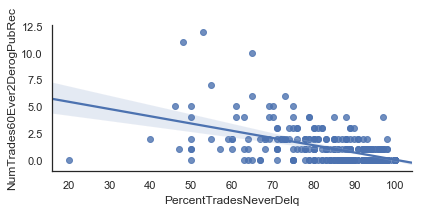

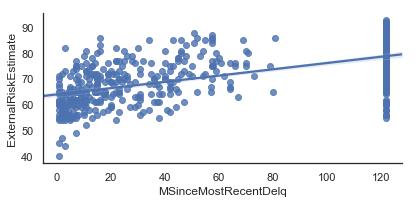

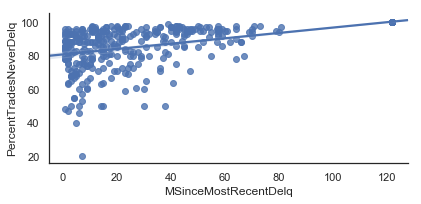

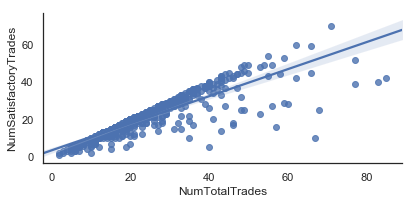

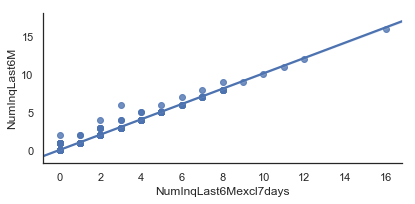

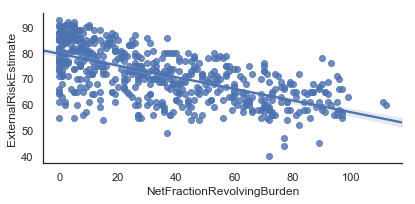

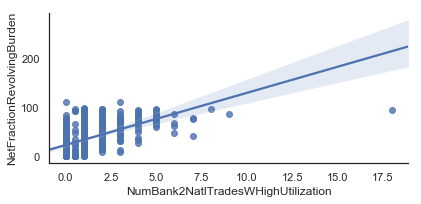

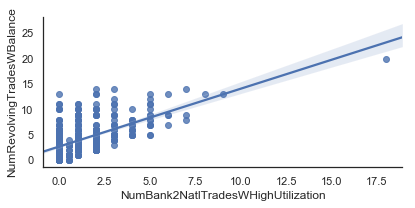

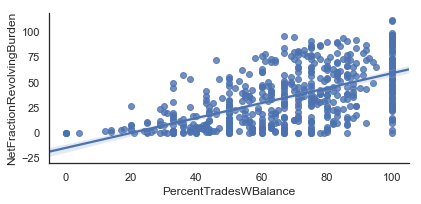

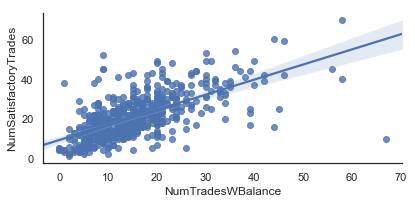

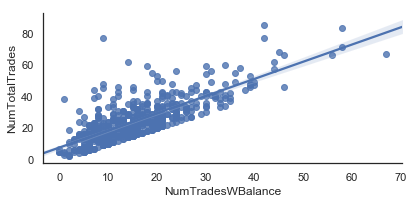

In [18]:
# Draw scatterplot for each pair of correlated continuous features
for elem in col_pair:
    sns.pairplot(df_train, x_vars=elem[0], y_vars=elem[1], size = 3, aspect = 2, kind = 'reg')

To get an overall view of the situation, we draw a **SPLOM (Scatter Plot Matrix)** in the cell below.<br>
**N.B.**: the image should be opened separately to better analyse each plot

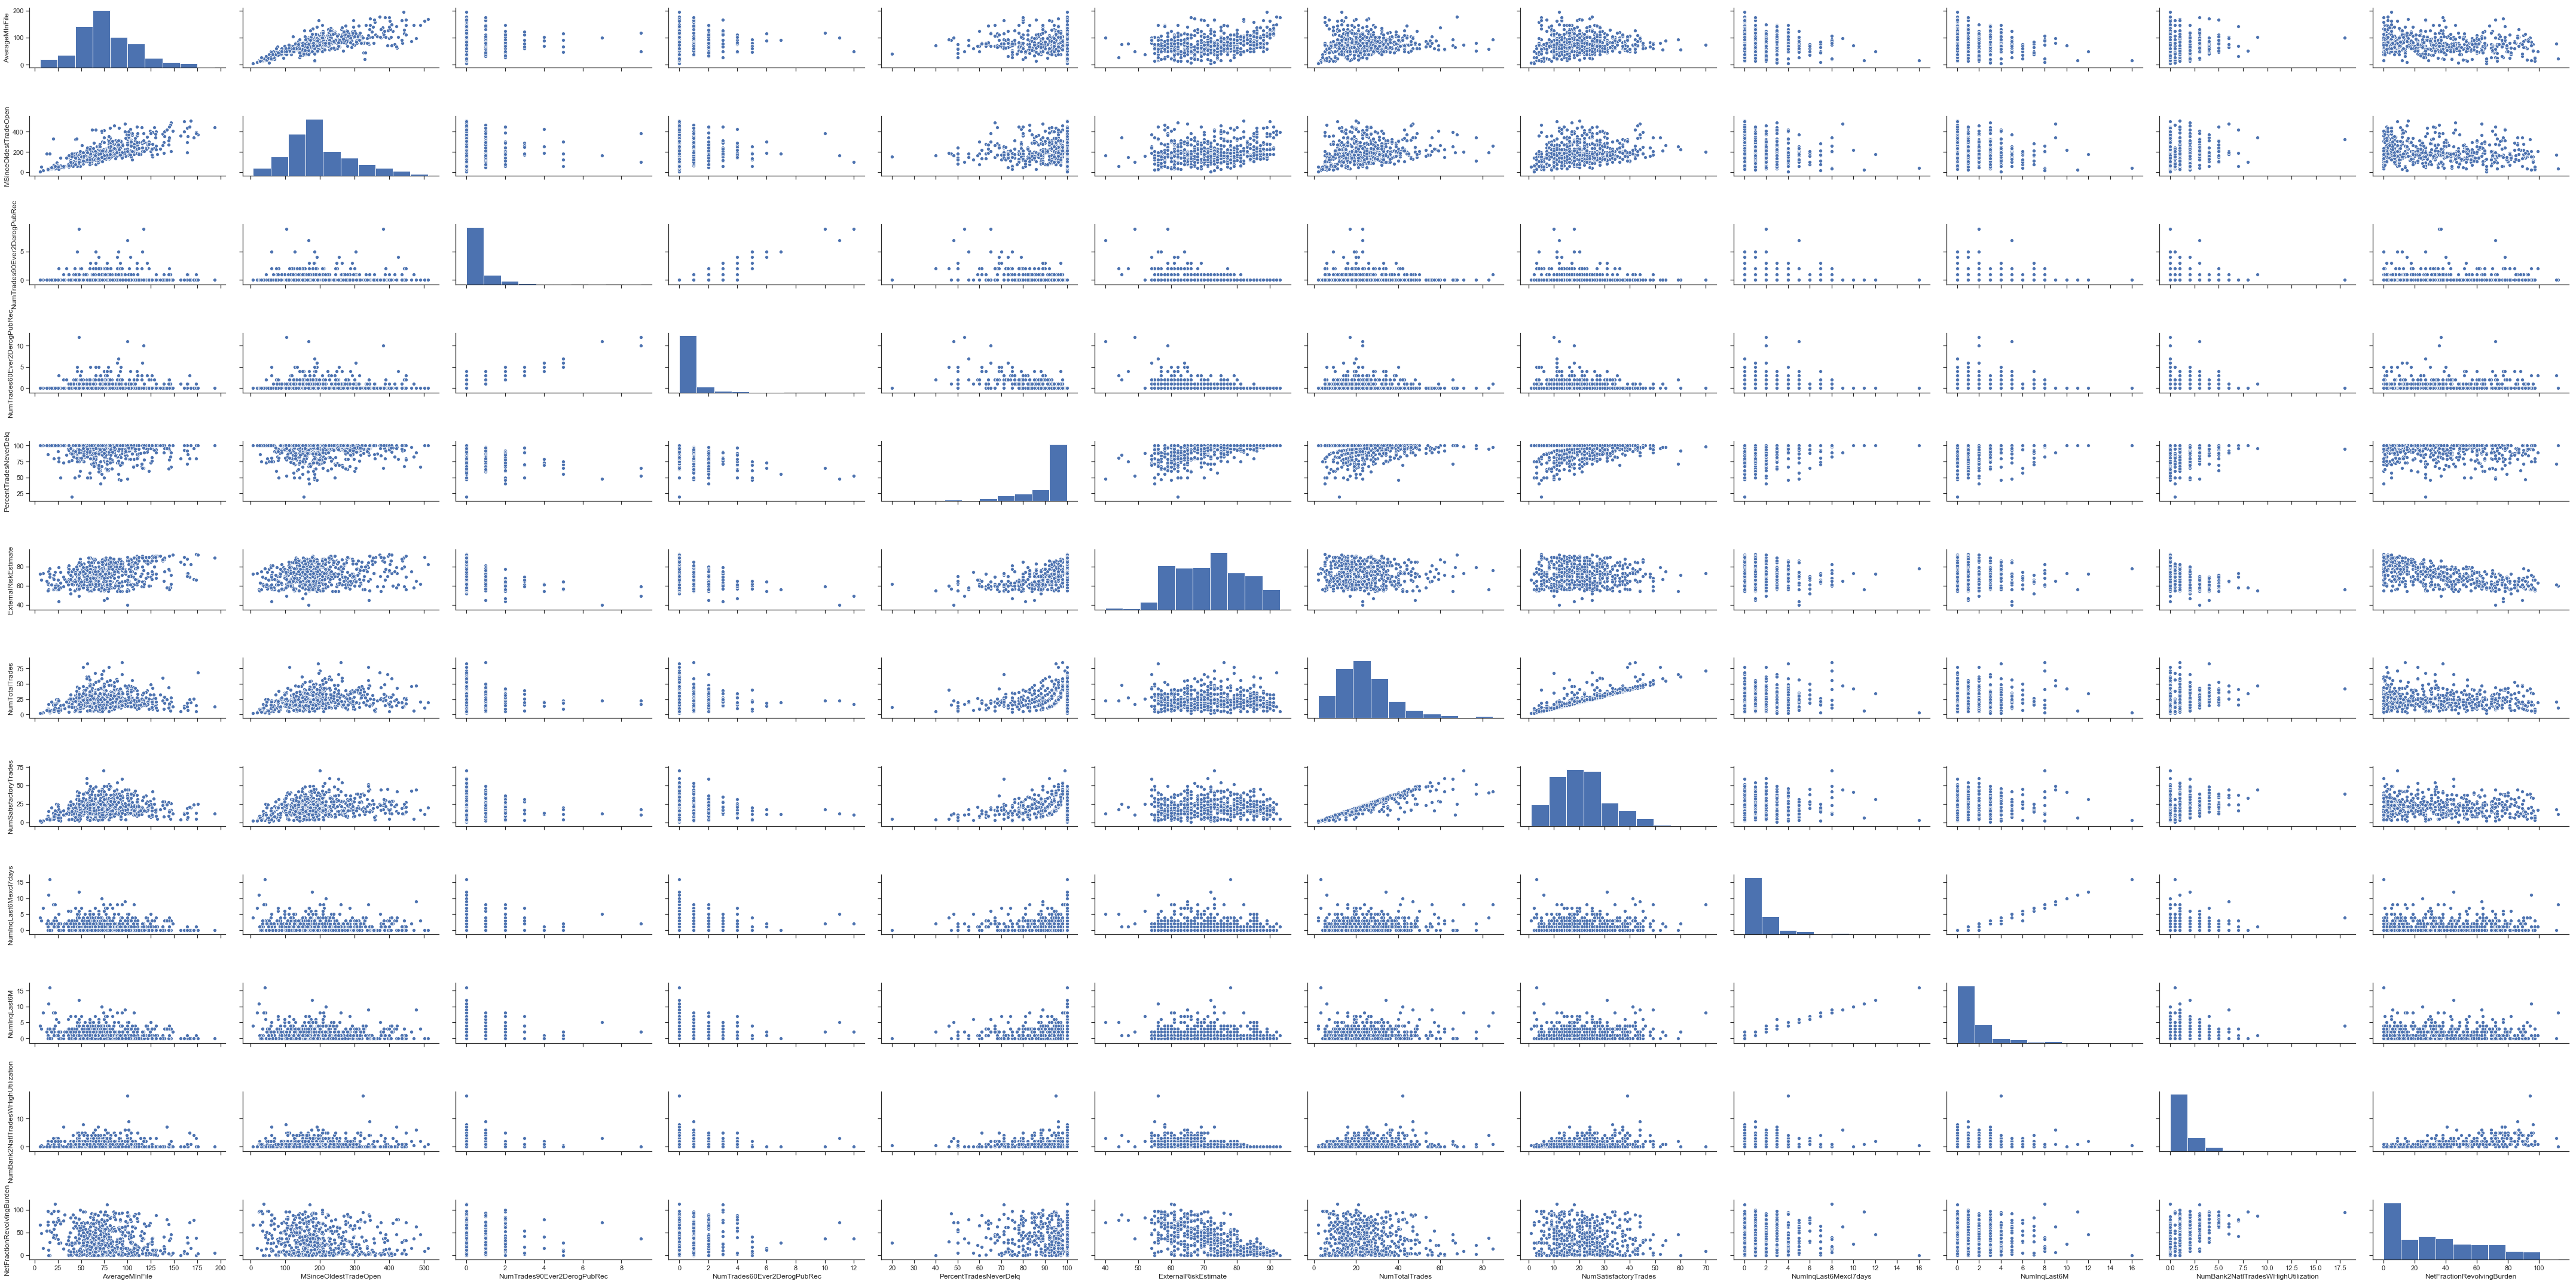

In [19]:
sns.set(style="ticks")

sns.pairplot(train_continuous_selection, aspect = 2)

### Considerations

From the scatter plots and the correlation analysis between our **train dataset** continuous features, we can point out that (values are quoted as at runtime):
1. some strong correlations are present, in particular between
    - **NumInqLast6Mexcl7days** vs **NumInqLast6M** (+0.9916)
    - **NumTrades90Ever2DerogPubRec** vs **NumTrades60Ever2DerogPubRec** (+0.8828)
    - **NumTotalTrades** vs **NumSatisfactoryTrades** (+0.8702)
    - **NumTradesWBalance** vs **NumTotalTrades** (+0.7778)

    We would expect these strong, positive correlations as they involve pairs of features that refer to the same domain concepts, i.e. the number of **inquiries**, the number of **trades**. For each pair, a feature comes from a subset of values of the other, so that it is expected for these features to behave in a very similar way.

2. some other considerable correlations are present:
    - **AverageMInFile** vs **MSinceOldestTradeOpen** (+0.7307)<br>
        We would expect this, as both the features refer to the seniority of the single trade. Thus, the average month in file should behave in the same way as the count of months since the oldest trade was opened.<br><br>
        
    - **MSinceMostRecentDelq** vs **PercentTradesNeverDelq** (+0.6703)<br>
        The number of months passed since the most recent delinquency is positively correlated with the portion of trades that have never been delinquent: it is expectable, as the older the most recent delinquency, the higher are the chances that a borrower's trades have not been delinquent.<br><br>
        
	- **NumTradesWBalance** vs **NumSatisfactoryTrades** (+0.6561)<br>
        This positive correlations brings evidence to the fact that the higher amount of trades with balance a borrower has established, the more likely that borrower's trades are to be satisfactory (i.e. payments are on-time).<br><br>
        
    - **NetFractionRevolvingBurden** vs **ExternalRiskEstimate** (-0.6353)<br>
        The external credit score seems to be negatively correlated with the revolving balance by credit limit ratio. This makes sense, as the higher the ratio, the higher is the borrower risk (i.e. the probability of default or late payment delinquency), so that the external credit score decreases. <br><br>

	- **PercentTradesNeverDelq** vs **NumTrades60Ever2DerogPubRec** (-0.6240)<br>
        The portion of trades for each borrower that have never been delinquent is negatively correlated with the number of trade lines that recorded a 60 days past-due payment. This can be expected, as if the single borrower has many trades that have suffered late payments for at least 2 months, the percentage of trades that never incurred in late payments must be lower.<br><br>
        
	- **NumBank2NatlTradesWHighUtilization** vs **NumRevolvingTradesWBalance** (+0.6227)<br>
         The number of bank trades characterized by high utilization is positively correlated with the number of revolving trades with a balance, somehow indicating that the "revolving" type of trades is more likely to be highly utilized.<br><br>
        
	- **MSinceMostRecentDelq** vs **ExternalRiskEstimate** (+0.6073)<br>
        The better the external credit score estimate (higher score), the more months have passed since the most recent delinquency event. This positive correlation is expected.<br><br>
    
    - **PercentTradesWBalance** vs **NetFractionRevolvingBurden** (+0.5915)<br>
        The more trades that a borrower established have a balance, the more likely it is for him to get a high revolving balance by credit limit ratio: this correlation can be partly affected by the fact that to have a fraction revolving burden, a trade must be of the type "with balance".<br><br>
        
	- **NumBank2NatlTradesWHighUtilization** vs **NetFractionRevolvingBurden** (+0.5913)<br>
        The number of bank trades with high utilization is positively correlated with the revolving balance by credit limit ratio: it shows that in our training dataset, it is more likely for a borrower to overdraw his credit limit if the majority of the trades he set are highly utilised.<br><br>
        
	- **PercentTradesNeverDelq** vs **ExternalRiskEstimate** (+0.5598)<br>
        We would expect this positive correlation, as the higher portion of trades have never been delinquent, the higher the external credit score should be - if we assume that the external risk measure is accurate enough.<br><br>

The highlighted correlation between continuous features pose a relevant issue when it comes to build predictive models.<br>
In fact, including such features in a model would result in **multicollinearity problems** that might affect the model accuracy. In that case, the **variance inflation factor (VIF)** should be considered to better assess their impact. Since it is an advanced topic, for simplicity we will not consider it in this analysis.

## Interactions with the target feature
We now analyse the relationship between each feature and the target feature, distinguishing between continuous and categorical features.<br>

**N.B.: we are still focused on the train dataset portion.**

### Target feature encoding
First of all, we need to check if the target feature can be analysed in order to understand its interactions with descriptive features.<br>
Our target feature describes whether an applicant was 90 days past due or worse at least once over a period of 24 months from when the credit account was opened.<br>
From the overview of the dataset given in previous sections, we know that the target feature is categorical and presents two levels: "Good" and "Bad" we check **'RiskPerformance' cardinality** formally.

In [24]:
# Check target feature levels
df_train['RiskPerformance'].dtypes

CategoricalDtype(categories=['Bad', 'Good'], ordered=False)

We need to transform (i.e. 'encode') our target feature, in order to perform our analysis. Most prediction models require numerical features, so we are not able to work with the actual cardinality state.<br>
Since the target feature presents a very low cardinality (2 levels only), it is easy to **encode 'RiskPerformance' as a dummy variable**.<br>

**N.B.**: we follow the logic of 'ExternalRiskEstimate', so we assign the value 1 to 'Good' and the value 0 to 'Bad' consumers.

In [25]:
# Dummy code the target feature
df_train['RiskPerformance'] = np.where(df_train.RiskPerformance == 'Good', 1, 0)

# Check new target feature type
df_train['RiskPerformance'].dtypes

dtype('int64')

In [27]:
df_train.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
154,0,65,116.0,3,39,22,0,0,95,15.0,...,50,47.0,5,4,1.0,69,True,False,100.0,15
270,0,65,106.0,5,42,11,1,0,92,22.0,...,60,NaN,4,1,1.0,83,True,False,85.0,10
330,0,77,131.0,3,76,23,0,0,100,122.0,...,19,NaN,6,2,0.0,44,False,False,96.0,10
429,0,55,127.0,9,60,28,2,0,80,7.0,...,69,142.0,7,9,1.0,89,True,True,93.0,26
294,0,60,410.0,7,124,29,0,0,97,20.0,...,70,56.0,10,4,3.0,83,True,False,91.0,26
476,1,78,155.0,5,70,20,0,0,100,122.0,...,41,22.0,2,3,1.0,63,False,False,100.0,12
179,1,61,158.0,20,71,21,0,0,95,47.0,...,95,NaN,7,2,4.0,100,True,False,100.0,21
64,1,75,90.0,4,40,20,0,0,95,79.0,...,26,96.0,10,2,0.0,75,True,False,100.0,15
202,0,61,118.0,19,63,26,1,0,78,14.0,...,65,67.0,3,4,1.0,88,True,False,96.0,23
606,1,72,149.0,2,63,46,0,0,100,122.0,...,34,83.0,4,5,2.0,75,False,False,94.0,36


The target feature has been correctly encoded to a dummy variable (numerical), so we are ready to proceed with our analysis tasks.

### Continuous features
We now plot the relationship between each pair of continuous feature and target feature by means of scatter plots.
Then we discuss what can be observed from the plots.

In [42]:
# Show continuous features
list(train_continuous)

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'PercentSatisfactoryTrades',
 'NumTradesWBalance']

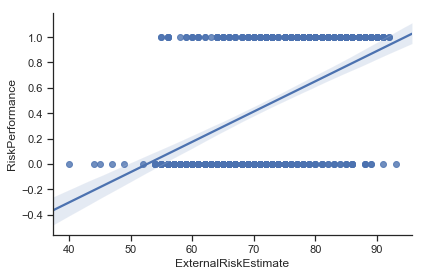

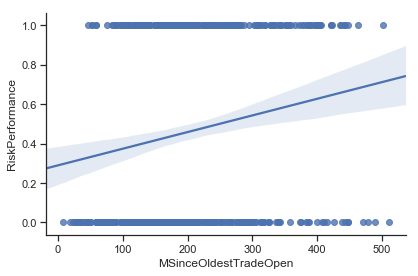

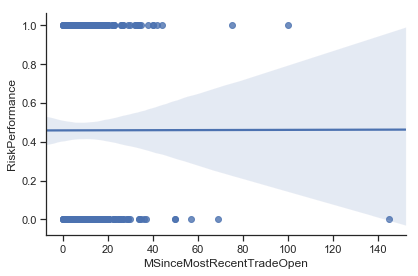

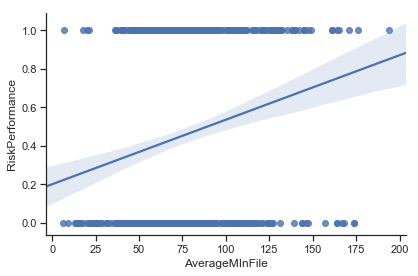

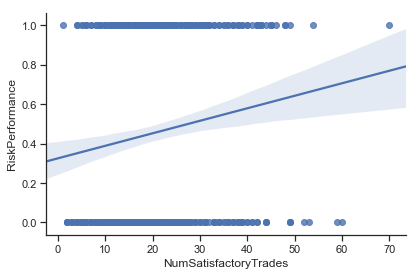

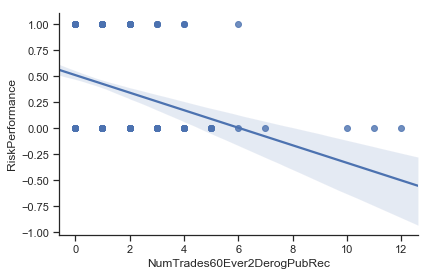

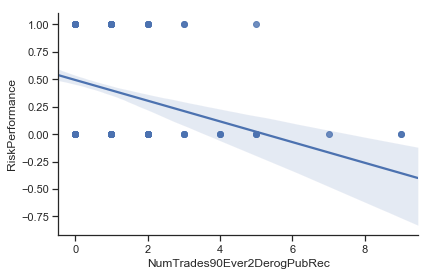

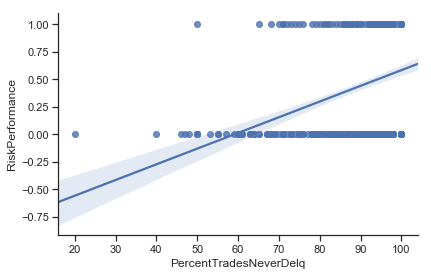

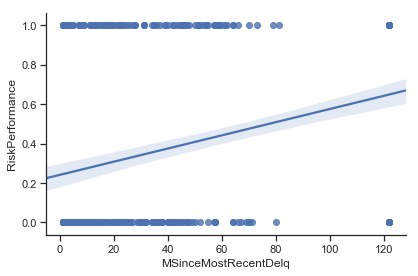

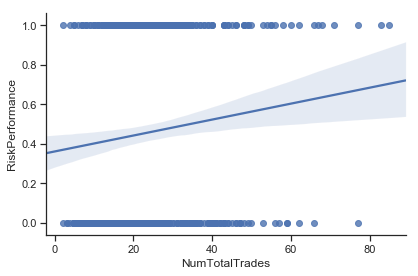

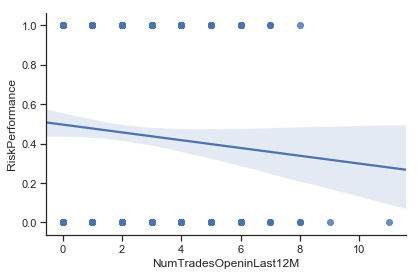

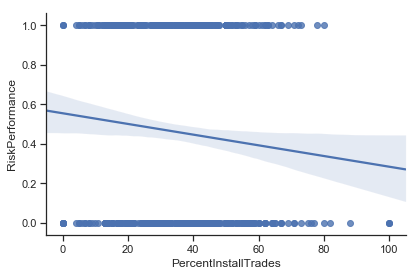

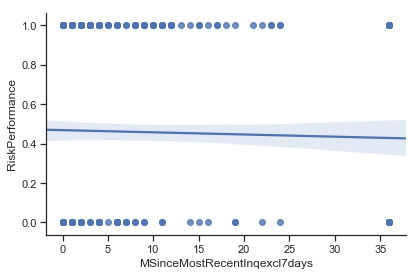

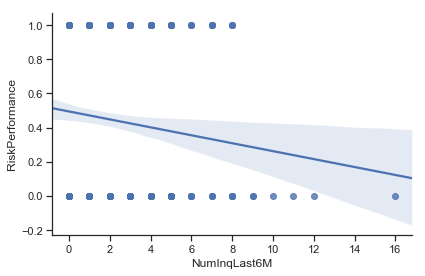

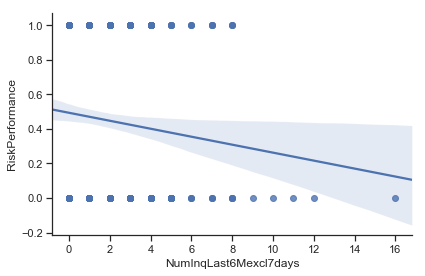

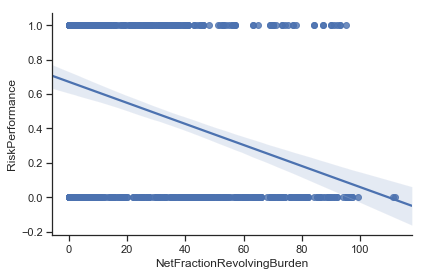

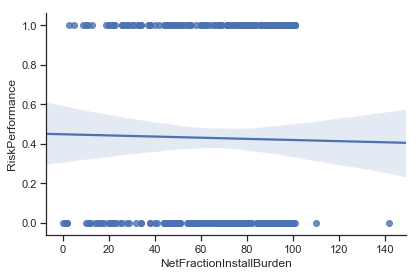

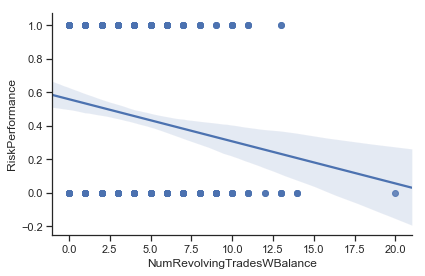

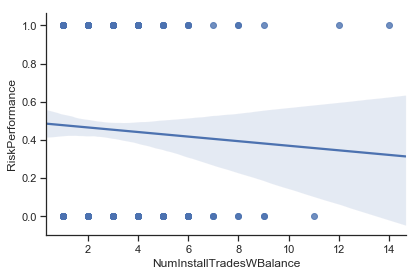

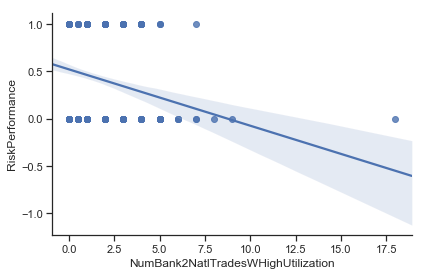

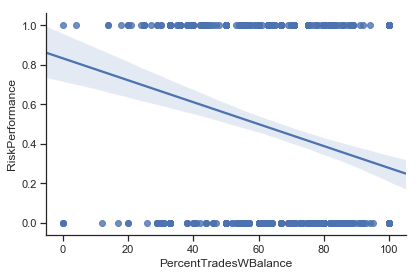

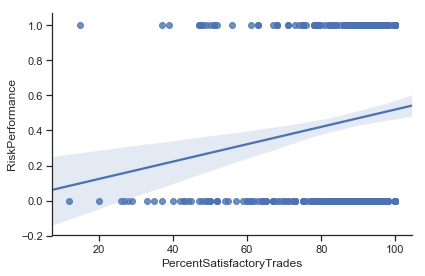

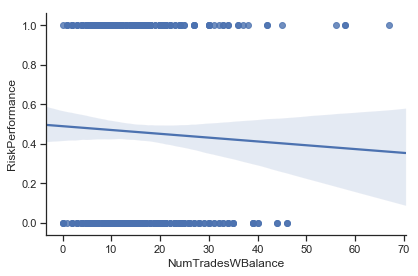

In [43]:
# Draw scatterplots for each pair
for elem in list(train_continuous.columns):
    sns.pairplot(df_train, x_vars = elem, y_vars = 'RiskPerformance', size = 4, aspect = 1.5, height = 2, kind = 'reg')

It is not easy to understand the interaction between the target feature and each continuous descriptive feature, as it can be seen from the scatter plots.<br>
The main reason is ascribable to the intrinsic dummy characteristic of our target variable: since it presents only two levels, every scatterplot will show all the target values distributed in two parallel lines, each correspondent to
- **0 = 'Bad'**, late payments, bad borrower
- **1 = 'Good'**, no late payments, good borrower

We can only infere that there is some kind of interaction between the pair of features when we notice that the dots (feature values) are 'well-enough' separated horizontally (i.e. on the X-axis).<br>
For the summentioned reasons, it may be useful to look directly at correlation measures. By **arranging the strength of each correlation in descending order**, we can easily assess the impact of each continuous feature on our target feature.

In [35]:
# Add target feature to continuous features list
cont_incl_target = list(train_continuous.columns)
cont_incl_target.insert(0, 'RiskPerformance')

# Get dataframe portion from a list of columns
train_cont_target = df_train[cont_incl_target]
train_cont_target.reset_index(drop=True)

# Build correlation matrix
corr_matrix = train_cont_target.corr()

# Store features correlations in a list of tuples
corr_list = []
corr_dict = dict(corr_matrix['RiskPerformance'])
keyes = corr_dict.keys()
t = tuple()

for i in keyes:
    t = (abs(corr_dict[i]),corr_dict[i] , i )
    corr_list.append(t)

# Sort the list
corr_list.sort(reverse=True)

# Show results
print("Correlations between target and continuous features:\n")
for i in range(len(corr_list)):
    if corr_list[i][2] != 'RiskPerformance':
        print('{:+.4f}'.format(corr_list[i][1]) + " : target vs " + corr_list[i][2])

Correlations between target and continuous features:

+0.4896 : target vs ExternalRiskEstimate
-0.3521 : target vs NetFractionRevolvingBurden
+0.3487 : target vs PercentTradesNeverDelq
+0.3424 : target vs MSinceMostRecentDelq
-0.2557 : target vs PercentTradesWBalance
-0.2243 : target vs NumTrades60Ever2DerogPubRec
+0.2130 : target vs AverageMInFile
-0.1899 : target vs NumBank2NatlTradesWHighUtilization
-0.1818 : target vs NumTrades90Ever2DerogPubRec
+0.1612 : target vs MSinceOldestTradeOpen
+0.1569 : target vs PercentSatisfactoryTrades
-0.1461 : target vs NumRevolvingTradesWBalance
+0.1394 : target vs NumSatisfactoryTrades
+0.1068 : target vs NumTotalTrades
-0.0939 : target vs NumInqLast6M
-0.0932 : target vs PercentInstallTrades
-0.0916 : target vs NumInqLast6Mexcl7days
-0.0723 : target vs NumTradesOpeninLast12M
-0.0380 : target vs NumInstallTradesWBalance
-0.0366 : target vs NumTradesWBalance
-0.0312 : target vs MSinceMostRecentInqexcl7days
-0.0150 : target vs NetFractionInstallBurde

After having examined each continuous feature interaction with the target, from both a chart and a numerical point of view, we can note that:
- **ExternalRiskEstimate** has the strongest positive interaction of the group. As we would expect, a higher external credit score is associated with a higher probability of being a 'Good' borrower, with a low risk of late payments.
- **NetFractionRevolvingBurden** has a moderate, negative interaction with the target feature. The ratio between revolving balance and credit limit seems to have a negative impact on the borrower's risk: we would expect it, as a higher credit balance referred to a certain credit limit implies a higher credit risk.
- **PercentTradesNeverDelq** has a moderate, positive interaction with the target feature. A high percentage of trades referred to a borrower that never recorded any delinquency is thus associated with a lower credit risk.
- **MSinceMostRecentDelq** has a moderate, positive interaction with the target feature. It seems that the older the most recent delinquency, the higher is the borrower's quality (and lower the credit risk). From a financial point of view it sounds customary: if a lot of time has passed since the most recent episode of delinquency, it implies that the borrower has improved his credit standing.
- **PercentTradesWBalance** has a negative interaction with the target feature. Interestingly, the fact that a trade has been established with a contractual balance seems to hamper the credit quality of a borrower for a certain measure.
- **NumTrades60Ever2DerogPubRec** has a negative interaction with the target feature. The number of trade lines that record a 60 days past-due payment seems to be a worsening factor for the borrower's credit quality - as it appears from our training dataset.
- **AverageMInFile** has a positive interaction with the target feature. Interestingly, the number of months (on average) the borrower has appeared in the credit bureau file is positively correlated with the borrower's quality.

The aforementioned features show a moderate correlation with the target feature and might be good candidates for a predictive model.<br>
The other features have a weak correlation with the target feature and therefore are not listed in detail.

### Categorical features
We plot pairwise interaction between each categorical feature and the target feature.
Then we discuss what can be observed from the plots.<br>
We will consider the following categorical features:
- **MaxDelq2PublicRecLast12M**
- **MaxDelqEver**
- **DelqEver**
- **DelqLast12M**

In [44]:
# Show categorical features
list(train_categorical)

['MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'RiskPerformance',
 'DelqEver',
 'DelqLast12M']

We draw stacked bar plots between the categorical features and our target features (still considering our training dataset).
**Warning: the following cell takes some time to execute.**

MaxDelq2PublicRecLast12M
Index 	 Count
7 	 439
5 	 16
6 	 90
3 	 2
2 	 22
4 	 6
--------------------------------------------------
MaxDelqEver
Index 	 Count
6 	 175
5 	 60
7 	 243
4 	 26
2 	 54
3 	 17
--------------------------------------------------
DelqEver
Index 	 Count
True 	 332
False 	 243
--------------------------------------------------
DelqLast12M
Index 	 Count
False 	 439
True 	 136
--------------------------------------------------


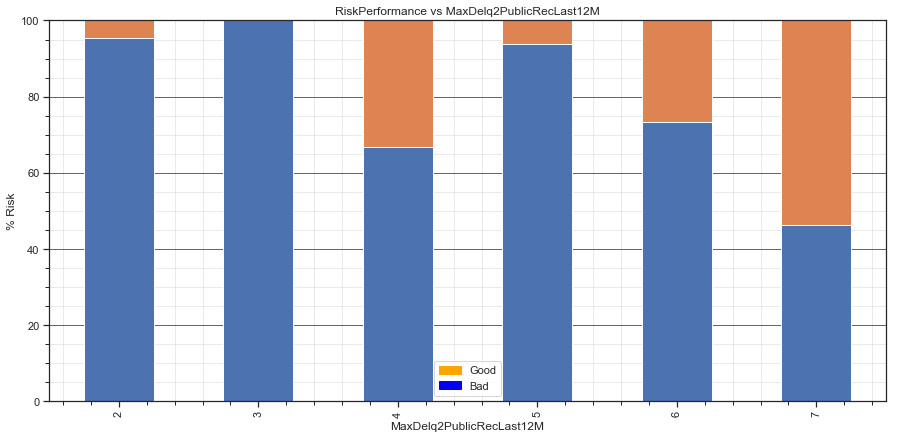

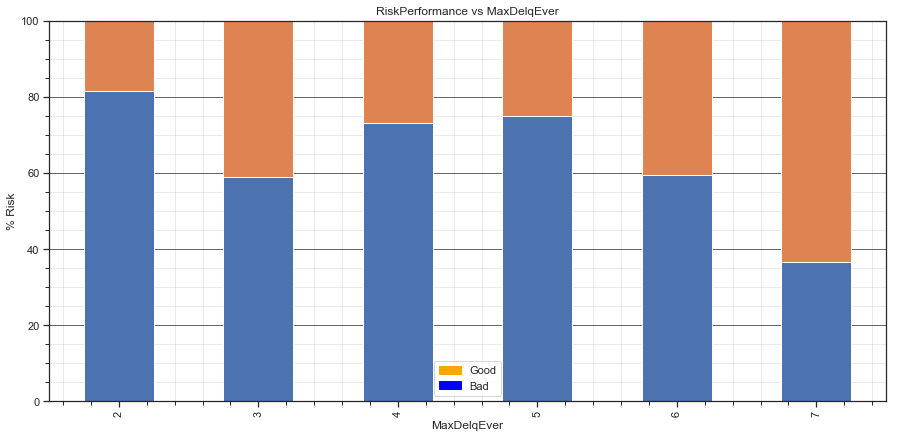

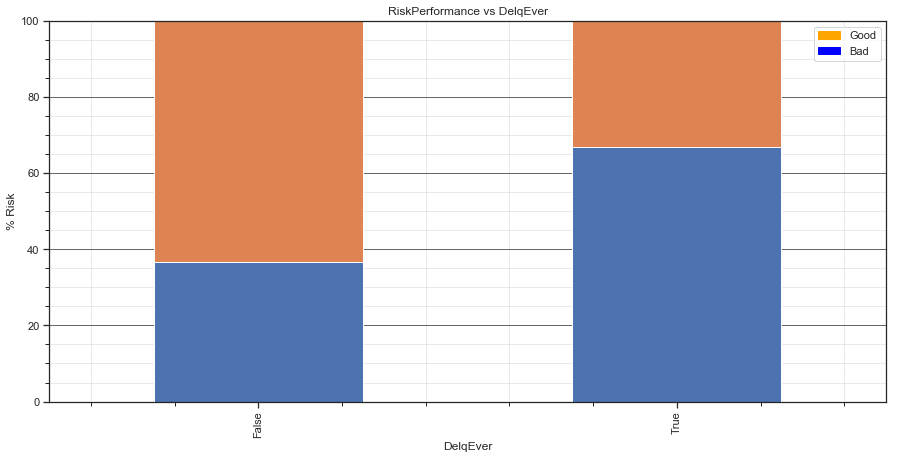

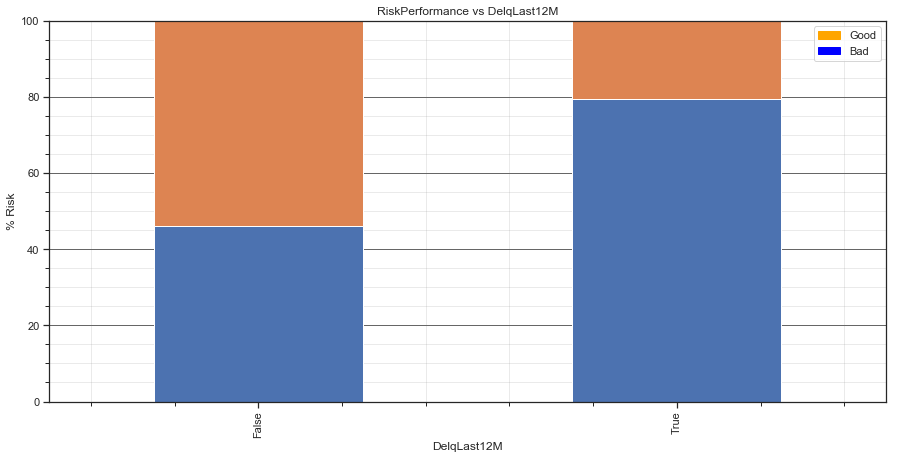

In [45]:
for elem in list(train_categorical):
    if elem != 'RiskPerformance':
        #Using code from the module lab
        var = pd.unique(df_train[elem].ravel())

        # add new column and set values to zero
        df_train['percent'] = 0

        #print header
        print(elem)
        print("Index \t Count")

        # for each delinquency category
        for i in var:

            count = df_train[df_train[elem] == i].count()['RiskPerformance']
            count_percentage = (1 / count) * 100

            # print out index vs count
            print(i, "\t", count)

            index_list = df_train[df_train[elem] == i].index.tolist()
            for ind in index_list:
                df_train.loc[ind, 'percent'] = count_percentage

        group = df_train[['percent',elem,'RiskPerformance']].groupby([elem,'RiskPerformance']).sum()

        my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance vs "+elem, figsize=(15,7), grid=True)

        # add legend
        red_patch = mpatches.Patch(color='orange', label='Good')
        blue_patch = mpatches.Patch(color='blue', label='Bad')
        my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

        # add gridlines
        plt.grid(b=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

        my_plot.set_xlabel(elem)
        my_plot.set_ylabel("% Risk")
        my_plot.set_ylim([0,100])
        print("-"*50)

In [46]:
# Drop 'percent' column generated to draw the bar plots and restore original columns
df_train.drop('percent', axis = 1, inplace = True)
df_train.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
154,0,65,116.0,3,39,22,0,0,95,15.0,...,50,47.0,5,4,1.0,69,True,False,100.0,15
270,0,65,106.0,5,42,11,1,0,92,22.0,...,60,NaN,4,1,1.0,83,True,False,85.0,10
330,0,77,131.0,3,76,23,0,0,100,122.0,...,19,NaN,6,2,0.0,44,False,False,96.0,10
429,0,55,127.0,9,60,28,2,0,80,7.0,...,69,142.0,7,9,1.0,89,True,True,93.0,26
294,0,60,410.0,7,124,29,0,0,97,20.0,...,70,56.0,10,4,3.0,83,True,False,91.0,26


We can look at the categorical features in pairs, as they refer to the same concepts but measured on different time scales (and a pair is derived from the other):

- **MaxDelq2PublicRecLast12M** and **MaxDelqEver**:
At first glance, the figures are mixed and not as expected.
The scales have been made equal from the data cleaning phase.
As we can note, there is not a clear decrease in the number of defaulted borrowers ('Bad') as we move towards decreasing measures of delinquency.
    - **MaxDelq2PublicRecLast12M** has very few entries for some delinquency measures, this should be taken into account when designing predictive models, since the shuffle-and-split technique can lead to issues.
    - A shorter time scale implies more bad borrowers, i.e. more credit risk. This makes sense, as recent delinquencies are seen as strong risk indicators.
    - no clear trend of decreasing frequency of "bad" borrowers is present as delinquency scale improves for **MaxDelqEver**. At least, the feature measured over the last 12 months shows a very high frequency of 'Bad' outcomes for level 3 (120+ days delinquent).

    
- **DelqEver** and **DelqLast12M**:
The figures show both a higher percentage of 'Good' borrowers when there have been no delinquencies recorded (both ever and in the last 12 months). This is expected, as it is less likely that a borrower defaults abruptly withouth any past risk signal.
Percentages between 'Good' and 'Bad' are more pronounced in the delinquency history measured in the last 12 months, so that if a borrower has been delinquent at least once in the last year he has around 80% the likelihood to be a 'Bad' borrower, while only 50% if he has never been delinquent during the last year.

In order to build a prediction model, we believe that the features
- **MaxDelq2PublicRecLast12M**
- **DelqLast12M**

represent fairly good candidates, since measurements over the last 12 months seem to be more accurate.
- **MaxDelq2PublicRecLast12M** has higher percentages of 'Bad' borrowers in each feature level, if compared to **MaxDelqEver**.
- the same applies to **DelqLast12M**, as it has been derived from **MaxDelq2PublicRecLast12M**.

# Predictive Modeling
In this section, we build three different (supervised) models in order to predict our target feature based on the training dataset.
<br>

**N.B.**: as the selected feature **MaxDelq2PublicRecLast12M** shows a very low frequency of observations for the levels 3 and 4, we exclude those values from our training models. It is possible because we encode the feature as a dummy feature, obtaining a new feature for each original level.

## Import required packages
We import the packages required for this section here.

In [47]:
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Before starting to build the models, we need to perform some preliminary operations in order to make our features ready.<br>
We carry out all the preliminary operations before building the models, distinguishing between the different data portions that we need, i.e.
- **training set**
- **testing set**
- our original dataframe including all the data for **cross-validation**

## Prepare training set

### Dummy coding
In order to train models based on our data, we are required to manipulate the categorical features that we want to include and perform **dummy coding**, since we are not allowed to use categorical features.<br>
The categorical features that we selected and we need to encode are:
- **DelqLast12M**
- **MaxDelq2PublicRecLast12M**

In [60]:
# Store categorical features in variables
train_to_dummy1 = pd.DataFrame(df_train['DelqLast12M'])
train_to_dummy2 = pd.DataFrame(df_train['MaxDelq2PublicRecLast12M'])

# Dummy encode the features
train_dummy_1 = pd.get_dummies(train_to_dummy1)
train_dummy_2 = pd.get_dummies(train_to_dummy2)

# Concatenate newly generated dummy features to our dataframe
df_train = pd.concat([df_train, train_dummy_1], axis=1)
df_train = pd.concat([df_train, train_dummy_2], axis=1)

# Check data types
df_train.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

### Feature selection

We can now select the features that will be involved in our models.<br>

**Note the exclusion of:**
- **MaxDelq2PublicRecLast12M_3**
- **MaxDelq2PublicRecLast12M_4**

In [61]:
# Select model features
model_features = ['ExternalRiskEstimate',
                  'MSinceMostRecentDelq',
                  'PercentTradesNeverDelq',
                  'PercentTradesWBalance',
                  'NetFractionRevolvingBurden',
                  'DelqLast12M_True',
                  'DelqLast12M_False',
                  'MaxDelq2PublicRecLast12M_2',
                  #'MaxDelq2PublicRecLast12M_3',
                  #'MaxDelq2PublicRecLast12M_4',
                  'MaxDelq2PublicRecLast12M_5',
                  'MaxDelq2PublicRecLast12M_6',
                  'MaxDelq2PublicRecLast12M_7']

# Store model features data
X_train = pd.DataFrame(df_train[model_features])
# Store target feature data
y_train = df_train.RiskPerformance

# Check what the model is being fed with
X_train.head()

,ExternalRiskEstimate,MSinceMostRecentDelq,PercentTradesNeverDelq,PercentTradesWBalance,NetFractionRevolvingBurden,DelqLast12M_True,DelqLast12M_False,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
154,65,15.0,95,69,50,0,1,0,0,0,1
270,65,22.0,92,83,60,0,1,0,0,0,1
330,77,122.0,100,44,19,0,1,0,0,0,1
429,55,7.0,80,89,69,1,0,0,1,0,0
294,60,20.0,97,83,70,0,1,0,0,0,1


## Prepare testing set

We perform the same operations for the testing set, as we have not manipulated it yet.
Prior to that, we need to set the appropriate feature types and encode the target feature.

### Set appropriate feature types

In [62]:
# Select columns containing categorical data
test_categorical = df_test[['MaxDelq2PublicRecLast12M','MaxDelqEver','RiskPerformance', 'DelqEver', 'DelqLast12M']].columns

# Convert data type to category for these columns
for column in test_categorical:
    df_test[column] = df_test[column].astype('category')  

# Select continuous features columns
test_continuous = df_test.select_dtypes(include = ['int64', 'float64'])

# Check feature types
df_test.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [63]:
# Encode target feature
df_test['RiskPerformance'] = np.where(df_test['RiskPerformance'] == "Good", 1, 0)
df_test.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
662,0,72,243.0,11,184,30,0,0,97,46.0,...,62,56.0,8,3,3.0,71,True,False,100.0,21
774,1,83,202.0,10,98,22,3,1,88,34.0,...,6,83.0,4,2,0.0,50,True,False,88.0,12
589,0,86,219.0,4,79,19,0,0,95,57.5,...,2,NaN,1,2,0.0,14,True,False,100.0,2
12,1,69,469.0,4,106,33,1,1,78,8.0,...,2,NaN,5,1,0.0,38,True,True,92.0,13
1,1,75,381.0,15,108,20,0,0,95,14.0,...,32,64.0,6,4,3.0,77,True,False,100.0,15


### Dummy coding

In [64]:
# Store categorical features in variables
test_to_dummy1 = pd.DataFrame(df_test['DelqLast12M'])
test_to_dummy2 = pd.DataFrame(df_test['MaxDelq2PublicRecLast12M'])

# Do dummy coding with Pandas
test_dummy_1 = pd.get_dummies(test_to_dummy1)
test_dummy_2 = pd.get_dummies(test_to_dummy2)

# Concatenate newly generated dummy features to our dataframe
df_test = pd.concat([df_test, test_dummy_1], axis=1)
df_test = pd.concat([df_test, test_dummy_2], axis=1)

# Check data types
df_test.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [65]:
# Store model features data
X_test = pd.DataFrame(df_test[model_features])
# Store target feature data
y_test = df_test.RiskPerformance

# Check what the model is being fed with
X_test.head()

,ExternalRiskEstimate,MSinceMostRecentDelq,PercentTradesNeverDelq,PercentTradesWBalance,NetFractionRevolvingBurden,DelqLast12M_True,DelqLast12M_False,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
662,72,46.0,97,71,62,0,1,0,0,0,1
774,83,34.0,88,50,6,0,1,0,0,0,1
589,86,57.5,95,14,2,0,1,0,0,0,1
12,69,8.0,78,38,2,1,0,0,0,1,0
1,75,14.0,95,77,32,0,1,0,0,0,1


## Prepare cross-validation set
We perform the same operations as for the testing set on the cross-validation set, i.e. our entire dataframe before it was splitted.

### Set appropriate feature types

In [66]:
# New variable for cross-validation, store the categorical features as in the original dataframe
complete_categorical = df[['MaxDelq2PublicRecLast12M','MaxDelqEver','RiskPerformance', 'DelqEver', 'DelqLast12M']].columns

# Set categorical types in original dataframe
for column in complete_categorical:
    df[column] = df[column].astype('category')

complete_continuous = df_test.select_dtypes(include = ['int64', 'float64'])

# Encode target feature
df['RiskPerformance'] = np.where(df['RiskPerformance'] == "Good", 1, 0)

df.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

### Dummy coding

In [67]:
# Store categorical features in variables
cv_to_dummy1 = pd.DataFrame(df['DelqLast12M'])
cv_to_dummy2 = pd.DataFrame(df['MaxDelq2PublicRecLast12M'])

# Do dummy coding with Pandas
cv_dummy_1 = pd.get_dummies(cv_to_dummy1)
cv_dummy_2 = pd.get_dummies(cv_to_dummy2)

# Concatenate newly generated dummy features to our dataframe
df = pd.concat([df, cv_dummy_1], axis=1)
df = pd.concat([df, cv_dummy_2], axis=1)

# Check data types
df.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [68]:
# Store model features data
X_cross = pd.DataFrame(df[model_features])

# Store target feature data
y_cross_act = df.RiskPerformance

# Check what the model is being fed with
X_cross.head()

,ExternalRiskEstimate,MSinceMostRecentDelq,PercentTradesNeverDelq,PercentTradesWBalance,NetFractionRevolvingBurden,DelqLast12M_True,DelqLast12M_False,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
0,71,73.0,98,81,75,0,1,0,0,0,1
1,75,14.0,95,77,32,0,1,0,0,0,1
2,58,3.0,88,75,84,1,0,0,0,1,0
3,73,122.0,100,54,31,0,1,0,0,0,1
4,89,122.0,100,60,7,0,1,0,0,0,1


## Linear Regression

### Training
In this section, we train a linear regression model to predict the target feature.<br>
We will use the descriptive features selected in the previous sub-section.

### Training the model

In order to train the model, we need to
- **instantiate the LinearRegression class**
- **fit the model in our tranining set** of data.

In [69]:
# Instantiate LinearRegression
lin_reg = LinearRegression()

# Fit the model in the training dataset
lin_reg.fit(X_train[model_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
# Show descriptive features
print("Training features in X:\n")
print(*list(X_train), sep="\n")

Training features in X:

ExternalRiskEstimate
MSinceMostRecentDelq
PercentTradesNeverDelq
PercentTradesWBalance
NetFractionRevolvingBurden
DelqLast12M_True
DelqLast12M_False
MaxDelq2PublicRecLast12M_2
MaxDelq2PublicRecLast12M_5
MaxDelq2PublicRecLast12M_6
MaxDelq2PublicRecLast12M_7


### Coefficients
After having fitted the linear regression instance, we analyse the coefficients (weights) learned by the model and discuss their role.

In [87]:
print("Model intercept: ", '{:+.6f}'.format(lin_reg.intercept_))
#print("Features: \n\n", model_features)
#print("Coefficients: \n\n", lin_reg.coef_)
print()
print("Model coefficients:")
for i in range(len(model_features)):
    print('{:+.6f}'.format(lin_reg.coef_[i]) + " ----> " + model_features[i])

Model intercept:  -0.858810

Model coefficients:
+0.014190 ----> ExternalRiskEstimate
+0.000518 ----> MSinceMostRecentDelq
+0.004806 ----> PercentTradesNeverDelq
-0.000368 ----> PercentTradesWBalance
-0.002206 ----> NetFractionRevolvingBurden
+0.034520 ----> DelqLast12M_True
-0.034520 ----> DelqLast12M_False
-0.245048 ----> MaxDelq2PublicRecLast12M_2
-0.200334 ----> MaxDelq2PublicRecLast12M_5
-0.091195 ----> MaxDelq2PublicRecLast12M_6
-0.034520 ----> MaxDelq2PublicRecLast12M_7


The model we are building will learn from the training dataset how to 'weight' each feature (using the minimum square error function) to get an acceptable prediction for the target feature.<br>
It is worth to point out that we are trying to solve a **classification problem**, since we are trying to predict the behaviour of a categorical feature (**RiskPerformance**) that has only 2 levels ('Good' and 'Bad', now encoded respectively with 1s and 0s). For this reason, our model will estimate the **parameters w0, w1, ..., wn** assuming a linear relationship between the descriptive features and the target feature.<br>
At the **training stage** then, we can examine the **parameters** learnt by the model:

- the **intercept** (also known as bias) has a negative value and corresponds to the best estimate of the the target feature when all the descriptive features have zero values. **N.B.**: our target feature is not allowed to get negative values, but the linear regression tries to predict a value based on the best estimate of parameters. What will be predicted is something similar to the **probability** of an outcome to be 0 ('Bad') or 1 ('Good').
- each descriptive features has an estimated **weight**: they are listed in the cell above. The meaning of each **weight** is: each increment of 1 unit of the descriptive feature will result in an increment (if weight is positive) or decrement (if weight is negative) equal to the weight itself. For instance, with a weight for **ExternalRiskEstimate** = +0.0142, each incremental point of external credit score will **increment** the predicted amount of target feature by 0.0142 units.
<br>

The linear regression model gives us parameters and intercept, so we can build the linear regression equation:

y (**RiskPerformance** prediction) =
-0.858810 +<br>
+0.014190 * **ExternalRiskEstimate** +<br>
+0.000518 * **MSinceMostRecentDelq** +<br>
+0.004806 * **PercentTradesNeverDelq** +<br>
-0.000368 * **PercentTradesWBalance** +<br>
+0.002206 * **NetFractionRevolvingBurden** +<br>
-0.034520 * **DelqLast12M_False** +<br>
-0.245048 * **MaxDelq2PublicRecLast12M_2** +<br>
-0.200334 * **MaxDelq2PublicRecLast12M_5** +<br>
-0.091195 * **MaxDelq2PublicRecLast12M_6** +<br>
-0.034520 * **MaxDelq2PublicRecLast12M_7**

- **continuous descriptive features**:
    - **PercentTradesWBalance** is the only continuous feature that has a negative impact on the target variable
    - **ExternalRiskEstimate**, **MSinceMostRecentDelq**, **PercentTradesNeverDelq**, **NetFractionRevolvingBurden** all have a positive impact on the target feature: their unit increase produces (on average) an increase in the target feature accounting for the assigned weight (i.e. parameter) - *ceteris paribus*.

- **categorical descriptive features**:
    - **DelqLast12M_False** is included in the final equation as when it assumes the value 1, the respective feature **DelqLast12M_False** has zero value thus not impacting on the model (we can note their coefficients are the same but with inverted sign). On average, **DelqLast12M_False** and all the considered levels of **MaxDelq2PublicRecLast12M** have a negative impact on the target variable, thus increasing the credit risk. The logic is the same as explained for continuous features: a unit increase of **DelqLast12M_False** (that simply means: no delinquency recorded over the last 12 months) on average produces a negative impact equal to the assigned parameter on the target feature - *ceteris paribus*. This is certainly a result that we would not expect, as the credit risk should be lower for no delinquency recorded in the last year.

We have already mentioned the fact that the selected descriptive features included in the model have some correlation between each other. For this reason, each coefficient represents the "incremental" effect that we obtain when adding that specific variable to the model - having already accounted the effects of all the other features.

### Prediction
In this sub-section, we proceed with predicting the target feature value for the first 100 training set rows.

In [94]:
# Predict values
lin_reg_pred = lin_reg.predict(X_train[model_features])

# Show first 100 prediction examples
print("Predictions with multiple linear regression: \n")
actual_vs_predicted_lin_reg = pd.concat([y_train.reset_index(drop=True), pd.DataFrame(lin_reg_pred, columns=['Predicted'])], axis=1)
actual_vs_predicted_lin_reg.head(100)

Predictions with multiple linear regression: 



,RiskPerformance,Predicted
0,0,0.323213
1,0,0.285211
2,0,0.650552
3,0,-0.040974
4,0,0.215197
5,1,0.609222
6,1,0.172363
7,1,0.549013
8,0,0.144146
9,1,0.535109


As we can see, the prediction that we get through the linear regression model needs to be classified, as it returns a measure of probability about whether an example has a credit risk outcome of 1 or 0.<br>
To better understand the predicted values, we need to assign to each predicted value an appropriate value for the target feature.

In [142]:
# Put predictions in a dataframe
predictions = df_train[['RiskPerformance']]
pred = pd.DataFrame(lin_reg_pred, columns=['Predicted'])
predictions = pd.concat([predictions.reset_index(drop=True), pred], axis=1)

# Classify the predicted feature by thresholding
predictions['Predicted_class'] = np.where(predictions.Predicted >= 0.5, 1, 0)
predictions.head(100)

,RiskPerformance,Predicted,Predicted_class
0,0,0.0,0
1,0,0.0,0
2,0,1.0,1
3,0,0.0,0
4,0,0.0,0
5,1,1.0,1
6,1,0.0,0
7,1,1.0,1
8,0,0.0,0
9,1,1.0,1


In [136]:
# Classify values in the linear prediction object
# We need this step in order to perform evaluation
for i in range(len(lin_reg_pred)):
    if lin_reg_pred[i] >= 0.5:
        lin_reg_pred[i] = 1
    else:
        lin_reg_pred[i] = 0

#### Confusion Matrix

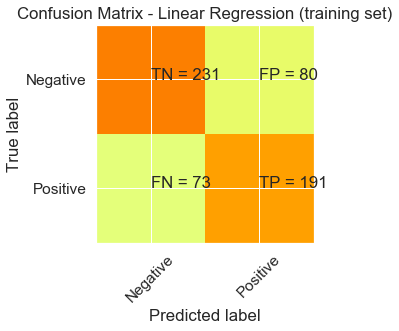

In [195]:
# Store predicted and actual values in variables
y_true = list(y_train)
y_pred = lin_reg_pred

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Linear Regression (training set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

From our data, we have only two possible outcomes for the target feature: "Good", assigned the value 1, and "Bad", assigned the value 0 - for regression purposes.<br>


Our linear regression model predicted a total of 575 outcomes for **RiskPerformance** for all the 575 individuals in our training set.<br>


The model predicted:
- "Good" = 1 = FP+TP = 80+191 = 271 outcomes
- "Bad" = 0 = TN+FN = 231+73 = 304 outcomes

From the **confusion matrix** that we built in the previous cell, we can better understand the predictive accuracy of our model by comparing the predicted cases (in the training set) to the actual outcomes of **RiskPerformance**:
- the training set shows TN+FP = 231+80 = 311 "Bad" outcomes (vs 304 predicted)
- the training set shows FN+TP = 73+191 = 264 "Good" outcomes (vs 271 predicted)

We list all the confusion matrix elements in detail:
- **TP - True Positive** (191) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Good"
- **TN - True Negative** (231) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Bad"
- **FP - False Positive** (80) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Bad"
- **FN - False Negative** (73) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Good"

#### Accuracy Score and Classification Report

In [132]:
print("Accuracy:", '{:.4f}'.format(accuracy_score(y_true, y_pred)*100), "%")

Accuracy: 73.3913 %


The **Accuracy Score** is the ratio of correctly predicted observations over the total number of observations.
- **accuracy= (TP+TN)/(TP+FP+TN+FN)** = (191+231) / (191+80+231+73)

We may think that a high accuracy result means a very good model, and for some extend it can be true, but that happens only when the values of false positive and false negatives are very similar (i.e. symmetric datasets). For this reason, we should look at further accuracy measures.

In [149]:
target_names = ['class bad', 'class good']
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.76      0.74      0.75       311
  class good       0.70      0.72      0.71       264

   micro avg       0.73      0.73      0.73       575
   macro avg       0.73      0.73      0.73       575
weighted avg       0.73      0.73      0.73       575



- **Precision = TP/(TP+FP)**.

    - **70% among all the predicted "Good" are actually "Good" borrowers**
    - **76% among all the predicted "Bad" are actually "Bad" borrowers**
    
    Our model predicts default cases better than good borrowers, and that is where we can see the effects of a relevant amount of FP (false positive): if the level of FP rises as predicted by the model, the precision deteriorates. This could represent an issue for the customer's financial business.
    
    
- **Recall = TP/(TP+FN)**.

    - **72% among all the actual "Good" have been correctly labeled as "Good"**
    - **74% among all the actual "Bad" have been correctly labeled as "Bad"**

    Recall should be taken into consideration when the cost associated with the presence of FN is high. Our model labelled 73 borrowers as "Bad" when they were actually "Good", and this may represent an issue since the company could lose profitable (and "Good") clients due to misclassification. Still, the values seems not to be worrying enough. Surely, for a lending company, it is crucial to correctly classify the customers with high risk of late payments/default, so the FP level should be kept checked carefully.
    
    
- **F1-score**.

    As a weighted average of Precision and Recall, the F1-score takes both false positives and false negatives into account in order to correct accuracy of models showing high precision and low recall - works better if false positives and false negatives have similar cost, and the distribution is uneven. In our case, the F1-score is close to Precision and Recall enough, so we can assume that our model is not affected by the aforementioned issues.

### Evaluation
In this section, we evaluate our model using classification measures on the hold-out test set corresponding to the remaining 30% of the observations. We compare the results with the evaluation measures showed for the training set and then we compare those measures with a cross-validated model.

In [150]:
# Predict values
test_lin_reg_pred = lin_reg.predict(X_test[model_features])

# Show first 100 prediction examples
print("TEST SET - Predictions with multiple linear regression: \n")
test_actual_vs_predicted_lin_reg = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(test_lin_reg_pred, columns=['Predicted'])], axis=1)
test_actual_vs_predicted_lin_reg.head(100)

TEST SET - Predictions with multiple linear regression: 



,RiskPerformance,Predicted
0,0,0.421013
1,1,0.658886
2,0,0.769344
3,1,0.424291
4,1,0.501360
5,1,0.639512
6,1,0.605774
7,1,0.004191
8,1,0.552824
9,0,0.570341


In [151]:
# Classify the predicted feature
test_actual_vs_predicted_lin_reg['Predicted_class'] = np.where(test_actual_vs_predicted_lin_reg.Predicted >= 0.5, 1, 0)
test_actual_vs_predicted_lin_reg.head()

,RiskPerformance,Predicted,Predicted_class
0,0,0.421013,0
1,1,0.658886,1
2,0,0.769344,1
3,1,0.424291,0
4,1,0.501360,1


In [152]:
# Classify values in the linear prediction object
# We need this step in order to perform evaluation
for i in range(len(test_lin_reg_pred)):
    if test_lin_reg_pred[i] >= 0.5:
        test_lin_reg_pred[i] = 1
    else:
        test_lin_reg_pred[i] = 0

#### Confusion Matrix

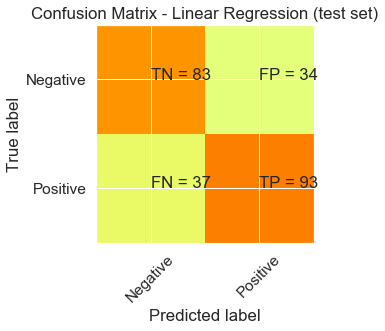

In [153]:
# Store predicted and actual values in variables
test_y_true = list(y_test)
test_y_pred = test_lin_reg_pred 

# Build confusion matrix
cm = confusion_matrix(test_y_true, test_y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Linear Regression (test set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [154]:
print("Accuracy Score:", accuracy_score(test_y_true, test_y_pred)*100, "%")

Accuracy Score: 71.25506072874494 %


In [155]:
target_names = ['class bad', 'class good']
print(classification_report(test_y_true, test_y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.69      0.71      0.70       117
  class good       0.73      0.72      0.72       130

   micro avg       0.71      0.71      0.71       247
   macro avg       0.71      0.71      0.71       247
weighted avg       0.71      0.71      0.71       247



- **Accuracy Score** on 30% hold-out test set is 71.25%, which is lower than accuracy obtained when predicting the target feature on the training set (73.39%). The trained model seems to have some issues when predicting values outside the known labeled observations. It is worth considering that the accuracy may vary since everytime the train-test-split algorithm is run, the rows are shuffled.


- **Precision**:
    - **73% among all the predicted "Good" are actually "Good" borrowers**
    - **69% among all the predicted "Bad" are actually "Bad" borrowers**
    
    The model improves his precision for the "Good" outcomes (from 70% to 73%), while it worsens precision on the "Bad" outcomes (from 76% to 69%). In the test set, the models is better at predicting the "Good" outcomes, while it was better with the "Bad" on the training set. Since for our business case the cost related to FP is high, we can note that our model performed better on the test case since the average amount of FP affecting the "Good" precision is lower.
    

- **Recall**:

    - **72% among all the actual "Good" have been correctly labeled as "Good"**
    - **71% among all the actual "Bad" have been correctly labeled as "Bad"**
   
   The model has the same recall for the "Good" class on the test set, while the recall for the "Bad" deteriorated (from 74% to 71%).
   

- **F1-Score**:

    F1-score deteriorated significantly for the "Bad" outcomes (from 75% to 70%) and got better for the "Good"(from 71% to 72%). This is thanks to the improvement in the recall for the "Good" class seen before.

### Compare these results with a cross-validated model
(i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [156]:
scores_all = cross_val_score(LinearRegression(), X_cross[model_features], y_cross_act, cv = 10)

total = 0
for i in range(len(scores_all)):
    total += scores_all[i]
    print("The score of", i+1, ":\t fold ", '{:.2f}'.format(scores_all[i]*100), "%")


print()
print("Average score: " + '{:.2f}'.format(scores_all.mean() * 100) + "%")

The score of 1 :	 fold  10.46 %
The score of 2 :	 fold  27.65 %
The score of 3 :	 fold  19.64 %
The score of 4 :	 fold  13.19 %
The score of 5 :	 fold  23.81 %
The score of 6 :	 fold  30.87 %
The score of 7 :	 fold  28.49 %
The score of 8 :	 fold  15.86 %
The score of 9 :	 fold  23.06 %
The score of 10 :	 fold  24.06 %

Average score: 21.71%


In [157]:
y_cross_pred = cross_val_predict(LinearRegression(), X_cross[model_features], y_cross_act, cv = 10)

In [158]:
# Classify values in the linear prediction object
# We need this step in order to perform evaluation
for i in range(len(y_cross_pred)):
    if(y_cross_pred[i] >= 0.5):
        y_cross_pred[i] = 1
    else:
        y_cross_pred[i] = 0    

#### Confusion Matrix

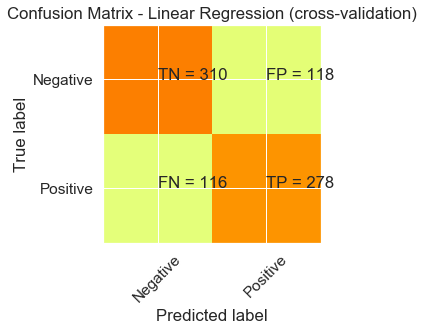

In [162]:
# Build confusion matrix
cm = confusion_matrix(list(y_cross_act), y_cross_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Linear Regression (cross-validation)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [163]:
print("Accuracy score:", accuracy_score(list(y_cross_act), y_cross_pred)*100, "%")

Accuracy score: 71.53284671532847 %


In [164]:
target_names = ['class bad', 'class good']
print(classification_report(y_cross_act, y_cross_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.73      0.72      0.73       428
  class good       0.70      0.71      0.70       394

   micro avg       0.72      0.72      0.72       822
   macro avg       0.71      0.71      0.71       822
weighted avg       0.72      0.72      0.72       822



- **Accuracy** for the cross-validated model is 71.53%, slightly better than accuracy when predicting the target feature on the test set (71.25%). The train-test-split algorithm could have produced a better accuracy for the train set, and the accuracy for the test set depends on the way the data has been (randomly) split (once) between training and test sets. For these reasons, we would prefer the accuracy score as from a 10-fold cross-validation: it is certainly more reliable - and we note that the accuracy from the test set was a better estimate. The strength of the cross-validation technique is the ability to train on multiple train-test splits.


- **Precision**:
    - **70% among all the predicted "Good" are actually "Good" borrowers**
    - **73% among all the predicted "Bad" are actually "Bad" borrowers**
    
    Cross validation proves to be better at predicting the "Bad" class from the test set, but loses some precision when predicting the "Good" class. The changes are not quite significant, so the levels of FP and FN are more or less homogeneous through the previous Training and Test sets.
    
  
- **Recall**:
    - **71% among all the actual "Good" have been correctly labeled as "Good"**
    - **72% among all the actual "Bad" have been correctly labeled as "Bad"**

    Cross validation brings a slight improvement in recall for predicting "Bad" outcomes (from 71 to 72%) and a correspondent deterioration in predicting "Good" outcomes (from 72 to 71%).
    

- **F1-Score**:

    Following the trend that we have seen for "Recall" measure, the cross-validated model performs better at classifying "Bad" (from 70 to 73%) while loses performance when predicting the "Good" (from 72 to 70%).
    
    
**N.B.**: since the accuracy measures for the previous test set and for the cross-validated model are quite close, we can say that our model does not overfits the predictions over our data. In fact, cross-validation and the test-set hold-out prediction can be seen as two independent prediction cases that give two different results over the accuracy of the model.

## Logistic Regression
In this section, we will try to predict the **RiskPerformance** outcomes using a different linear model: the **Logistic Regression**.<br>
We will proceed following the same structure as for the linear regression model, so we first train the model **on the same training set** defined at the beginning of this notebook (to make the models comparable) and then we will evaluate the model on the test set and with cross-validation.
### Training

In [228]:
# Instantiate LogisticRegression
log_reg = LogisticRegression()

# Fit the model in the training dataset
log_reg.fit(X_train[model_features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
print("\nDescriptive features in X:\n", X_train)
print("\nTarget feature in y:\n", y_train)


Descriptive features in X:
      ExternalRiskEstimate  MSinceMostRecentDelq  PercentTradesNeverDelq  \
154                    65                  15.0                      95   
270                    65                  22.0                      92   
330                    77                 122.0                     100   
429                    55                   7.0                      80   
294                    60                  20.0                      97   
476                    78                 122.0                     100   
179                    61                  47.0                      95   
64                     75                  79.0                      95   
202                    61                  14.0                      78   
606                    72                 122.0                     100   
608                    86                 122.0                     100   
388                    70                 122.0                     100

### Coefficients
After having fitted the logistic regression instance, we analyse the coefficients learned by the model and discuss their role.

In [169]:
print("Model intercept: ", '{:+.6f}'.format(log_reg.intercept_[0]))
print()
print("Model coefficients:")
for i in range(len(model_features)):
    print('{:+.6f}'.format(log_reg.coef_[0][i]) + " ----> " + model_features[i])

Model intercept:  -1.906029

Model coefficients:
+0.031114 ----> ExternalRiskEstimate
+0.005552 ----> MSinceMostRecentDelq
+0.013882 ----> PercentTradesNeverDelq
-0.006983 ----> PercentTradesWBalance
-0.016948 ----> NetFractionRevolvingBurden
-1.398263 ----> DelqLast12M_True
-0.507766 ----> DelqLast12M_False
-0.988021 ----> MaxDelq2PublicRecLast12M_2
-0.687416 ----> MaxDelq2PublicRecLast12M_5
+0.175893 ----> MaxDelq2PublicRecLast12M_6
-0.507766 ----> MaxDelq2PublicRecLast12M_7


In the **Logistic Regression** model, how we order the target variable outcome levels is important: for us, level "1" indicates "Good" Risk Performance, so the model coefficients will predict whether or not a borrower will be a "good" borrower or a "bad" borrower (i.e., the risk of default on a loan).

- **intercept** = -1.906029
    this is the predicted target value when when the values of all the descriptive features is 0.
    
- **ExternalRiskEstimate** = +0.031114
    The coefficient is positive, meaning that *ceteris paribus* (i.e. all other values being equal), borrowers with a higher credit score have a higher probability to fall in the "Good" target class. In particular, with an incremental increase of +1 of ExternalRiskEstimate, the natural log of the odds for the "Good" borrower event increase by the coefficient amount.

- **MSinceMostRecentDelq** = +0.005552
- **PercentTradesNeverDelq** = +0.013882
    
    The coefficients for these two features are still positive, meaning that a borrower that has been delinquent way in the past and with a good percentage of trades that never defaulted on payments is more likely to be a "Good" customer.

- **PercentTradesWBalance** = -0.006983
    This feature has a negative coefficient, meaning that a borrower with a higher portion of trades with a balance is more likely to default on loans (i.e. suffers a higher risk of default, thus a higher chance to fall in the "Bad" target class).

- **DelqLast12M_False** = -0.507766
    This categorical feature has a negative coefficients for the "false" level: it indicates that if a borrower has not been delinquent over the past 12 months he has lower chances to be a "Good" borrower. This should be furtherly investigated, but it is interesting to note that the coefficient for **DelqLast12M_True** is "more negative", meaning that having defaulted on payments at least once over the last year has a deteriorating impact on the credit standing.
    
- **MaxDelq2PublicRecLast12M**
    For this categorical feature, it seems that only the value 6 has a positive effect on the target outcome. All the other levels seem to have a pejorative impact on the credit risk.

### Prediction

In [172]:
log_reg_pred = log_reg.predict(X_train[model_features])

print("Predictions with Logistic regression: \n")
actual_vs_predicted_log_reg = pd.concat([y_train.reset_index(drop=True), pd.DataFrame(log_reg_pred, columns=['Predicted'])], axis=1)
actual_vs_predicted_log_reg.head(100)

Predictions with Logistic regression: 



,RiskPerformance,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,1,1
6,1,0
7,1,1
8,0,0
9,1,1


In [173]:
predictions = df_train[['RiskPerformance']]
pred = pd.DataFrame(log_reg_pred, columns=['Predicted'])
predictions = pd.concat([predictions.reset_index(drop=True), pred], axis=1)
predictions['Predicted_class'] = np.where(predictions.Predicted >= 0.5, "Good", "Bad")
print(predictions.head(100))

    RiskPerformance  Predicted Predicted_class
0                 0          0             Bad
1                 0          0             Bad
2                 0          1            Good
3                 0          0             Bad
4                 0          0             Bad
5                 1          1            Good
6                 1          0             Bad
7                 1          1            Good
8                 0          0             Bad
9                 1          1            Good
10                1          1            Good
11                1          1            Good
12                0          0             Bad
13                1          0             Bad
14                0          0             Bad
15                1          1            Good
16                0          0             Bad
17                0          0             Bad
18                1          1            Good
19                1          0             Bad
20           

#### Confusion Matrix

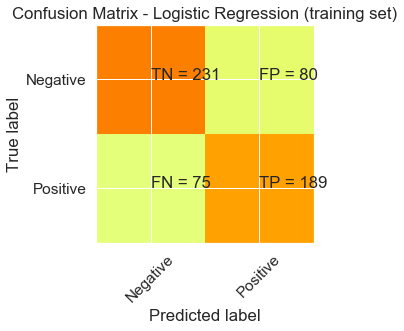

In [194]:
y_true = list(y_train)
y_pred = log_reg_pred 

# Build confusion matrix
cm = confusion_matrix(list(y_true), y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Logistic Regression (training set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

Our logistic regression model predicted a total of 575 outcomes for **RiskPerformance** for all the 575 individuals in our training set.<br>


The model predicted:
- "Good" = 1 = FP+TP = 80+189 = 269 outcomes
- "Bad" = 0 = TN+FN = 231+75 = 306 outcomes

From the **confusion matrix** that we built in the previous cell, we can better understand the predictive accuracy of our model by comparing the predicted cases (in the training set) to the actual outcomes of **RiskPerformance**:
- the training set shows TN+FP = 231+80 = 311 "Bad" outcomes (vs 306 predicted)
- the training set shows FN+TP = 73+191 = 264 "Good" outcomes (vs 269 predicted)

We list all the confusion matrix elements in detail:
- **TP - True Positive** (189) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Good"
- **TN - True Negative** (231) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Bad"
- **FP - False Positive** (80) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Bad"
- **FN - False Negative** (75) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Good"

#### Accuracy Score and Classification Report

In [176]:
print("Accuracy Score:", accuracy_score(y_true, y_pred)*100, "%")

Accuracy Score: 73.04347826086956 %


The **Accuracy Score** is the ratio of correctly predicted observations over the total number of observations.
- **accuracy= (TP+TN)/(TP+FP+TN+FN)** = (189+231) / (189+80+231+75)

We should look at further accuracy measures.

In [178]:
target_names = ['class bad', 'class good']
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.75      0.74      0.75       311
  class good       0.70      0.72      0.71       264

   micro avg       0.73      0.73      0.73       575
   macro avg       0.73      0.73      0.73       575
weighted avg       0.73      0.73      0.73       575



- **Precision = TP/(TP+FP)**.

    - **70% among all the predicted "Good" are actually "Good" borrowers**
    - **75% among all the predicted "Bad" are actually "Bad" borrowers**
    
    Our model predicts bad outcomes better than good borrowers, and that is where we can see the effects of a relevant amount of FP (false positive): if the level of FP rises as predicted by the model, the precision deteriorates. This could represent an issue for the customer's financial business.
    
    
- **Recall = TP/(TP+FN)**.

    - **72% among all the actual "Good" have been correctly labeled as "Good"**
    - **74% among all the actual "Bad" have been correctly labeled as "Bad"**

    Recall should be taken into consideration when the cost associated with the presence of FN is high. Our model labelled 75 borrowers as "Bad" when they were actually "Good", and this may represent an issue since the company could lose profitable (and "Good") clients due to misclassification.
    
    
- **F1-score**.

    As a weighted average of Precision and Recall, the F1-score takes both false positives and false negatives into account in order to correct accuracy of models showing high precision and low recall - works better if false positives and false negatives have similar cost, and the distribution is uneven. In our case, the F1-score is close to Precision and Recall enough, so we can assume that our model is not affected by the aforementioned issues.
    

**Note**: after training the model and analysing classification performance measures, logistic regression appears very similar to linear regression.

### Evaluation

In [179]:
df_test.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [229]:
test_log_reg_pred = log_reg.predict(X_test[model_features])

print("TEST - Predictions with logistic regression: \n")
test_actual_vs_predicted_log_reg = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(test_log_reg_pred, columns=['Predicted'])], axis=1)
test_actual_vs_predicted_log_reg.head(100)

TEST - Predictions with logistic regression: 



,RiskPerformance,Predicted
0,0,0
1,1,1
2,0,1
3,1,0
4,1,0
5,1,1
6,1,1
7,1,0
8,1,1
9,0,1


#### Confusion Matrix

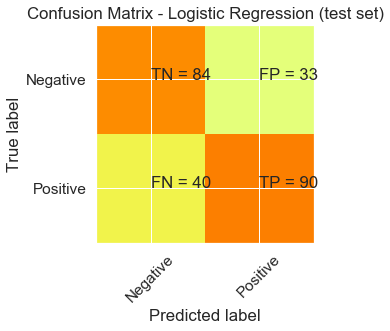

In [196]:
test_y_true = list(y_test)
test_y_pred = test_log_reg_pred 

# Build confusion matrix
cm = confusion_matrix(test_y_true, test_y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Logistic Regression (test set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [185]:
print("Accuracy Score:", accuracy_score(test_y_true, test_y_pred)*100, "%")

Accuracy Score: 70.44534412955466 %


In [186]:
target_names = ['class bad', 'class good']
print(classification_report(test_y_true, test_y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.68      0.72      0.70       117
  class good       0.73      0.69      0.71       130

   micro avg       0.70      0.70      0.70       247
   macro avg       0.70      0.71      0.70       247
weighted avg       0.71      0.70      0.70       247



- **Accuracy Score** on 30% hold-out test set is 70.45%, which is lower than accuracy obtained when predicting the target feature on the training set (73.04%). The trained model seems to have some issues when predicting values outside the known labeled observations. It is worth considering that the accuracy may vary since everytime the train-test-split algorithm is run, the rows are shuffled.


- **Precision**:
    - **73% among all the predicted "Good" are actually "Good" borrowers**
    - **68% among all the predicted "Bad" are actually "Bad" borrowers**
    
    The model improves his precision for the "Good" outcomes (from 70% to 73%), while it drops precision on the "Bad" outcomes (from 75% to 68%). In the test set, the models becomes better at predicting the "Good" outcomes, while it was better with the "Bad" on the training set. That means that the model predicts less FP on the test set than on the training set. We recall here that the cost of FP is high for the analysed business, so precision is fairly a good evaluation measure.
    

- **Recall**:

    - **72% among all the actual "Good" have been correctly labeled as "Good"**
    - **69% among all the actual "Bad" have been correctly labeled as "Bad"**
   
   The model sees a deteriorated recall on both the classes (from 74 to 72% for "Bad" and from 72 to 69% for "Good"). Therefore, our logistic regression model predicts more FN, that could lead to a misclassification of "Good" borrowers, leading to a loss of valuable customers.
   

- **F1-Score**:

    F1-score deteriorated significantly for the "Bad" outcomes (from 75% to 70%) and remained the same for the "Good" (71%). This is an effect of the loss of "Bad" prediction effectiveness seen before.

### Compare these results with a cross-validated model
(i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [187]:
scores_all = cross_val_score(LogisticRegression(), X_cross[model_features], y_cross_act, cv = 10)

total = 0
for i in range(len(scores_all)):
    total += scores_all[i]
    print("The score of", i+1, ":\t fold ", '{:.2f}'.format(scores_all[i]*100), "%")


print()
print("Average score: " + '{:.2f}'.format(scores_all.mean() * 100) + "%")

The score of 1 :	 fold  69.88 %
The score of 2 :	 fold  75.90 %
The score of 3 :	 fold  69.88 %
The score of 4 :	 fold  67.47 %
The score of 5 :	 fold  74.39 %
The score of 6 :	 fold  76.83 %
The score of 7 :	 fold  75.61 %
The score of 8 :	 fold  68.29 %
The score of 9 :	 fold  69.14 %
The score of 10 :	 fold  75.31 %

Average score: 72.27%


In [188]:
y_cross_pred = cross_val_predict(LogisticRegression(), X_cross[model_features], y_cross_act, cv = 10)

#### Confusion Matrix

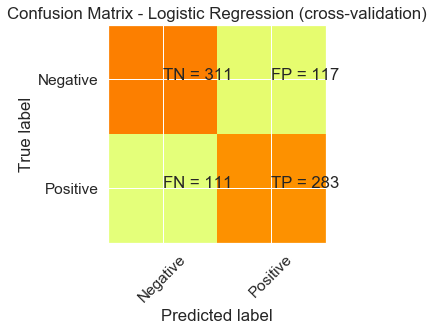

In [197]:
# Build confusion matrix
cm = confusion_matrix(list(y_cross_act), y_cross_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Logistic Regression (cross-validation)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [192]:
print("Accuracy score:", accuracy_score(list(y_cross_act), y_cross_pred)*100, "%")

Accuracy score: 72.26277372262774 %


In [193]:
target_names = ['class bad', 'class good']
print(classification_report(y_cross_act, y_cross_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.74      0.73      0.73       428
  class good       0.71      0.72      0.71       394

   micro avg       0.72      0.72      0.72       822
   macro avg       0.72      0.72      0.72       822
weighted avg       0.72      0.72      0.72       822



- **Accuracy** for the cross-validated model is 72.26%, showing that it performs better than when predicting the target feature on the test set (70.45%). It is worth remembering here that the train-test-split algorithm could have produced a better accuracy for the train set, and the accuracy for the test set depends on the way the data has been (randomly) split (once) between training and test sets. For these reasons, we would prefer the accuracy score as from a 10-fold cross-validation: it is certainly more reliable - and we note that the accuracy from the test set was a better estimate. The strength of the cross-validation technique is the ability to train on multiple train-test splits.


- **Precision**:
    - **71% among all the predicted "Good" are actually "Good" borrowers**
    - **74% among all the predicted "Bad" are actually "Bad" borrowers**
    
    Cross validation performs better at predicting the "Bad" class than the test set, but loses some precision when predicting the "Good" class. This means that the cross-validation model predicts more FP (in percentage) than on the test set. Nevertheless, the improvement when predicting "Bad" borrowers is considerable.
    
  
- **Recall**:
    - **72% among all the actual "Good" have been correctly labeled as "Good"**
    - **73% among all the actual "Bad" have been correctly labeled as "Bad"**

    Cross validation brings a slight improvement in recall for predicting "Bad" outcomes (from 72 to 73%) and a correspondent deterioration in predicting "Good" outcomes (from 69 to 72%).
    

- **F1-Score**:

    The cross-validated model performs better at classifying "Bad" (from 70 to 73%) with no change for the effectivness of "Good" predictions (71%).
    
    
**N.B.**: since the accuracy measures for the previous test set and for the cross-validated model are quite close, we can say that our model does not overfits the predictions over our data (the difference is less than 5%). In fact, cross-validation and the test-set hold-out prediction can be seen as two independent prediction cases that give two different results over the accuracy of the model.

## Random Forest classifier
In this section, we will try to predict the **RiskPerformance** outcomes using a different (non-linear) model: the **Random Forest classifier**.<br>
We will proceed following the same structure as for the linear regression model, so we first train the model **on the same training set** defined at the beginning of this notebook (to make the models comparable) and then we will evaluate the model on the test set and with cross-validation.

### Training

In [198]:
X_train.head()

,ExternalRiskEstimate,MSinceMostRecentDelq,PercentTradesNeverDelq,PercentTradesWBalance,NetFractionRevolvingBurden,DelqLast12M_True,DelqLast12M_False,MaxDelq2PublicRecLast12M_2,MaxDelq2PublicRecLast12M_5,MaxDelq2PublicRecLast12M_6,MaxDelq2PublicRecLast12M_7
154,65,15.0,95,69,50,0,1,0,0,0,1
270,65,22.0,92,83,60,0,1,0,0,0,1
330,77,122.0,100,44,19,0,1,0,0,0,1
429,55,7.0,80,89,69,1,0,0,1,0,0
294,60,20.0,97,83,70,0,1,0,0,0,1


In [252]:
# Instantiate Random Forest classifier class
rf = RandomForestClassifier(n_estimators = 40)

# Fit the model in the train dataset
rf.fit(X_train[model_features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Building the forest
The **Random Forest** model, as mentioned at the beginning of this section, is **non-linear**: it does not assume any linear relationship between the descriptive features we selected and the target feature. Thus, we cannot analyse any coefficients, as the model itself does not provide estimates of "weights" or parameters.
The Random Forest model works following this flow:
1. the model, from a set of features that we feed it with (m), selects randomly a portion k of the features themselves: k must be a portion of m, so that k < m. In our specific case, we selected 10 features (considering the dummy encoded variables).
2. once the model has selected a random portion of the starting 10 features, it finds the root node (d) after having found the best "split point" - to do that, it places the best feature attribute at the tree-root.
3. the model splits the root-node d in sub-nodes following a "best-split" algorithm.
4. the model iteratively repeats steps 1, 2, 3 until a number "l" of nodes is reached (target feature is kept as the leaf node).
5. the model builds a "forest of trees" by iteratively repeating steps 1,2,3,4 a number of times corresponding to the number of trees (n). In our case, we assigned n the value 40 (parameter **n_estimators** in the code). Those 40, randomly created trees will form our "random forest": an esemble of models that we train and, through consensus, will predict our target outcome.

### Making predictions
In order to predict the target feature, the random forest that we built (and trained) follows these further steps:

1. the model will consider the feature values it has been fed with
2. each randomly generated decision tree will follow its own rules to make a prediction for the target feature
3. for each individual considered in the dataset, every decision tree "votes" with its own prediction and the highest voted target outcome will be kept (majority voting from the "ensemble" of trees).<br>

Some parameters that we use in this model are described as follows:

- **n_estimators**: the amount of trees in the random forest. A high value of this parameter should lead to better prediction effectiveness, but there is a trade-off between accuracy and the amount of computing resources consumed by the system. Training a random forest classifier that generates a lot of decision trees might be expensive. For this reason, we choose a reasonable value (50).
- **max_depth** is associated with the depth of every tree in the forest. A "deep tree" has more splits, more leaves and then considers more data. We choose the default value (*none*).
- **min_samples_split** corresponds to the *minimum number of samples required to split an internal node*. Increasing such parameter means making each decision tree to consider more samples at each node. We choose the default value of 2.

### Prediction

In [253]:
rf_pred = rf.predict(X_train[model_features])

rf_class_pred = [0]*len(rf_pred)
for i in range(len(rf_pred)):
    if rf_pred[i] == 1:
        rf_class_pred[i] = "Good"
    else:
        rf_class_pred[i] = "Bad"        

In [254]:
# Show predicted target values and corresponding classes for the first 100 training set examples
print("Predicted value \t Predicted class")
for i in range(100):
    print(rf_pred[i], "\t"*3, rf_class_pred[i])

Predicted value 	 Predicted class
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
1 			 Good
0 			 Bad
1 			 Good
1 			 Good
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
1 			 Good
1 			 Good
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
0 			 Bad
1 			 Good
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
1 			 Good
0 			 Bad
0 			 Bad
1 			 

#### Confusion Matrix

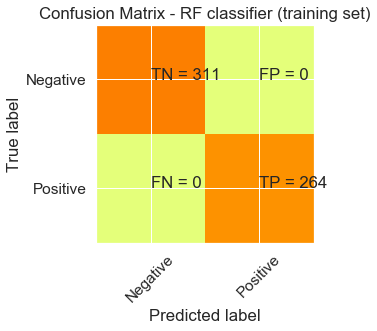

In [255]:
y_true = list(y_train)
y_pred = rf_pred 

# Build confusion matrix
cm = confusion_matrix(list(y_true), y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - RF classifier (training set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

Our random forest classifier model predicted a total of 575 outcomes for **RiskPerformance** for all the 575 individuals in our training set.<br>


The model predicted:
- "Good" = 1 = FP+TP = 0+264 = 264 outcomes
- "Bad" = 0 = TN+FN = 311+0 = 311 outcomes

From the **confusion matrix** that we built in the previous cell, we can better understand the predictive accuracy of our model by comparing the predicted cases (in the training set) to the actual outcomes of **RiskPerformance**:
- the training set shows TN+FP = 311+0 = 311 "Bad" outcomes (vs 311 predicted)
- the training set shows FN+TP = 0+264 = 264 "Good" outcomes (vs 264 predicted)

We list all the confusion matrix elements in detail:
- **TP - True Positive** (264) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Good"
- **TN - True Negative** (311) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Bad"
- **FP - False Positive** (0) = the cases in which
    - the model predicted "Good"
    - actual value of **RiskPerformance** is "Bad"
- **FN - False Negative** (0) = the cases in which
    - the model predicted "Bad"
    - actual value of **RiskPerformance** is "Good"

#### Accuracy Score and Classification Report

In [256]:
print("Accuracy Score:", accuracy_score(y_true, y_pred)*100, "%")

Accuracy Score: 100.0 %


The **Accuracy Score** is the ratio of correctly predicted observations over the total number of observations.
- **accuracy= (TP+TN)/(TP+FP+TN+FN)** = (264+311) / (264+0+311+0)

We should look at further accuracy measures.

In [268]:
target_names = ['class bad', 'class good']
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       1.00      1.00      1.00       311
  class good       1.00      1.00      1.00       264

   micro avg       1.00      1.00      1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575



- **Precision = TP/(TP+FP)**.

    - **100% among all the predicted "Good" are actually "Good" borrowers**
    - **100% among all the predicted "Bad" are actually "Bad" borrowers**
    
    All the "Good" and "Bad" predictions are correct, the model is extremely accuarate over the training set. No FP are present.
    
    
- **Recall = TP/(TP+FN)**.

    - **100% among all the actual "Good" have been correctly labeled as "Good"**
    - **100% among all the actual "Bad" have been correctly labeled as "Bad"**

    All the actual "Good" and "Bad" borrowers in the training set are predicted as such. There are no errors in classification for **RiskPerformance**.
    
    
- **F1-score**.

    Precision and Recall show perfect scores of 100%, so the F1-score is 100% itself.
    

**Note**: the random forest classifier predicts without errors the outcomes over the training set.

### Evaluation

In [269]:
df_test.dtypes

RiskPerformance                          int64
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                  float64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                   float64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

In [259]:
test_rf_pred = rf.predict(X_test[model_features])
print("TEST - Predictions with Random Forest Classifier: \n")
test_actual_vs_predicted_rf = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(test_rf_pred, columns=['Predicted'])], axis=1)
test_actual_vs_predicted_rf.head(100)

TEST - Predictions with Random Forest Classifier: 



,RiskPerformance,Predicted
0,0,0
1,1,1
2,0,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,0
9,0,0


#### Confusion Matrix

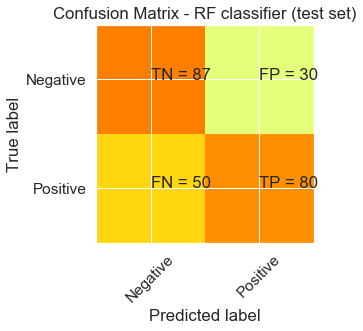

In [260]:
test_y_true = list(y_test)
test_y_pred = test_rf_pred 

# Build confusion matrix
cm = confusion_matrix(test_y_true, test_y_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - RF classifier (test set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [261]:
print("Accuracy Score:", accuracy_score(test_y_true, test_y_pred)*100, "%")

Accuracy Score: 67.61133603238866 %


In [262]:
target_names = ['class bad', 'class good']
print(classification_report(test_y_true, test_y_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.64      0.74      0.69       117
  class good       0.73      0.62      0.67       130

   micro avg       0.68      0.68      0.68       247
   macro avg       0.68      0.68      0.68       247
weighted avg       0.68      0.68      0.68       247



- **Accuracy Score** on 30% hold-out test set is 67.61%, which is dramatically lower than the accuracy obtained when predicting the target feature on the training set (100%). The trained model seems to have issues when predicting values outside the known labeled observations. After having tried multiple times the train-test-split algorithm, it seems that random forest predicts always very effectively over the training set but with much lower accuracy over data that it has not seen before. It might be a symptom of **overfitting** over the training data set.


- **Precision**:
    - **73% among all the predicted "Good" are actually "Good" borrowers**
    - **64% among all the predicted "Bad" are actually "Bad" borrowers**
    
    The model has a lower precision for the "Good" outcomes (from 100% to 73%), and it drops precision on the "Bad" outcomes as well(from 100% to 64%). Over the test set, the model performs much worse than over the training set, implying that it predicts many FP on the test set than on the training set (where there were none).
    

- **Recall**:

    - **62% among all the actual "Good" have been correctly labeled as "Good"**
    - **74% among all the actual "Bad" have been correctly labeled as "Bad"**
   
   The model sees a dramatic deterioration for recall on both the classes (from 100 to 74% for "Bad" and from 100 to 62% for "Good"). Therefore, our random forest model predicts many FN, leading to a misclassification of "Good" borrowers.
   

- **F1-Score**:

    F1-score deteriorated significantly for both classes (as we would expect for the considerations expressed before): "Bad" outcomes are now misclassified (from 100% to 69%), the same happens for the "Good" (from 100% to 67%).

### Compare these results with a cross-validated model
(i.e., a new model trained and evaluated using cross-validation on the full dataset).

In [263]:
scores_all = cross_val_score(RandomForestClassifier(), X_cross[model_features], y_cross_act, cv = 10)

total = 0
for i in range(len(scores_all)):
    total += scores_all[i]
    print("The score of", i+1, ":\t fold ", '{:.2f}'.format(scores_all[i]*100), "%")


print()
print("Average score: " + '{:.2f}'.format(scores_all.mean() * 100) + "%")

The score of 1 :	 fold  59.04 %
The score of 2 :	 fold  71.08 %
The score of 3 :	 fold  65.06 %
The score of 4 :	 fold  61.45 %
The score of 5 :	 fold  65.85 %
The score of 6 :	 fold  78.05 %
The score of 7 :	 fold  69.51 %
The score of 8 :	 fold  60.98 %
The score of 9 :	 fold  70.37 %
The score of 10 :	 fold  79.01 %

Average score: 68.04%


In [264]:
y_cross_pred = cross_val_predict(RandomForestClassifier(), X_cross[model_features], y_cross_act, cv = 10)

#### Confusion Matrix

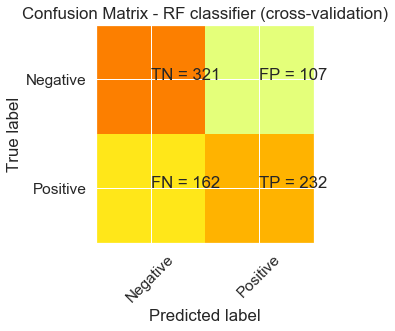

In [265]:
# Build confusion matrix
cm = confusion_matrix(list(y_cross_act), y_cross_pred)

# Plot confusion matrix
# Taken from https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - RF classifier (cross-validation)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()

#### Accuracy Score and Classification Report

In [266]:
print("Accuracy score:", accuracy_score(list(y_cross_act), y_cross_pred)*100, "%")

Accuracy score: 67.2749391727494 %


In [267]:
target_names = ['class bad', 'class good']
print(classification_report(y_cross_act, y_cross_pred, target_names = target_names))

              precision    recall  f1-score   support

   class bad       0.66      0.75      0.70       428
  class good       0.68      0.59      0.63       394

   micro avg       0.67      0.67      0.67       822
   macro avg       0.67      0.67      0.67       822
weighted avg       0.67      0.67      0.67       822



- **Accuracy** for the cross-validated model is 67.27%, showing that it performs in a very similar way when predicting the target feature on the test set, even if slighlty worse (67.61%). It is worth remembering here that the train-test-split algorithm could have produced a better accuracy for the test set, since the accuracy for the test set depends on the way the data has been (randomly) split (once) between training and test sets. For these reasons, we would prefer the accuracy score as from a 10-fold cross-validation: it is certainly more reliable - and we note that the accuracy from the test set was a better estimate. The strength of the cross-validation technique is the ability to train on multiple train-test splits.


- **Precision**:
    - **68% among all the predicted "Good" are actually "Good" borrowers**
    - **66% among all the predicted "Bad" are actually "Bad" borrowers**
    
    Cross validation performs better at predicting the "Bad" class than the test set (from 64 to 66%), but loses some precision when predicting the "Good" class (from 73 to 68%). This means that the cross-validation model predicts more FP (in percentage) than over the test set.
    
  
- **Recall**:
    - **59% among all the actual "Good" have been correctly labeled as "Good"**
    - **75% among all the actual "Bad" have been correctly labeled as "Bad"**

    Cross validation brings a slight improvement in recall for predicting "Bad" outcomes (from 74 to 75%) and a correspondent drop in effectiveness when predicting "Good" outcomes (from 62 to 59%).
    

- **F1-Score**:

    The cross-validated model performs slightly better at classifying "Bad" (from 69 to 70%). There is a sizeable deterioration in the "Good" prediction effectiveness (from 67 to 63%) due to significant drops in both precision and recall for the "Good" class.

# Improving Predictive Models

## Which model of the ones trained above performs better at predicting the target feature?
Is it more accurate than a simple model that always predicts the majority class (i.e., if RiskPerformance=0 is the majority class in your dataset, the simple model always predicts 0 for the target feature)? Justify your answers.

We have evaluated three models on the same data: we can now see which one is better at predicting our target feature (we will consider cross-validated scores):

- **Linear Regression** shows an accuracy of **71.53**
- **Logistic Regression** shows an accuracy of **72.26**
- **Random Forest Classifier** shows an accuracy of **67.27**

We can see that **Logistic Regression** predicts better the feature **RiskPerformance** than the other two models, even if **Linear Regression** is quite close.
It is worth to note that:
- **linear regression** predicts (on the cross-validated model):
    - 310 TN
    - 278 TP
    - 118 FP
    - 116 FN
    
- **logistic regression** respectively predicts (comparison with linear regression):
    - 311 TN (+1)
    - 283 TP (+5)
    - 117 FP (-1)
    - 111 FN (-5)

In [271]:
# Show the frequency of RiskPerformance in the main dataset
df['RiskPerformance'].value_counts()

0    428
1    394
Name: RiskPerformance, dtype: int64

We see that in our dataset we have
- "Bad" = 0: 428 observations
- "Good" = 1: 394 observations

If we devised a prediction model based on the most frequent target level ("Bad", in our case), we might predict
- 428 TN /(428+394) = 52.07% accuracy
- 0 TP
- 0 FP
- 394 FN that affect dramatically the effectiveness of this simple model: we would not want a lending firm avoid indiscriminately a rough half of the borrowers judging them as "Bad" when they are not. The financial sustainability of the firm would be harmed.

On the other hand, **Logistic regression** predicts way better the TP (in the simple model just devised we predict 0 TP) and predicts way less FN.

## Improving the models
In order to try to improve our **Logistic Regression** model, we can apply **feature re-scaling** in order to normalise the feature values.

In [273]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 3))
X_cross = scaler.fit_transform(X_cross)

y_pred_linear_df = cross_val_predict(LogisticRegression(),X_cross, y_cross_act,cv=10)

from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(list(y_cross_act), y_pred_linear_df)*100,'%')

Accuracy 72.62773722627736 %


Through **feature re-scaling** (fine-tuning the feature-range to 0,3) we gained a little improvement in accuracy:
- original logistic regression model = 71.53%
- feature re-scaled logistic regression = 72.63%

We obtained a better performance of +0.1%.

## Summarise your understanding of the problem and of your predictive modeling results so far

The overall goal of the entire project is to come to a reliable prediction about the credit risk of a single consumer (potential customer for the firm). For a successful lending firm, the ability to discriminate between bad borrowers and good borrowers is crucial: they make financial decisions (as long as interest rates) based on the credit risk of each customer. Furthermore, it is necessary for such a company to avail of a cospicuous amount of data related to the prospect customers: a high level of granularity is essential in order to better understand how customer behaviours impact their credit risk assessment. Accuracy, as long as all the performance measures examined, are fundamental measures that can distinguish between a good prediction model and a less good one. We found two fairly good models (linear regression and logistic regression), with comparable performances. But from the theory we learnt that logistic regression would be a better choice for our problem, since it is configured as a **classification problem** (we want to predict a dummy, categorical feature). It has been interesting to note how the random forest classifier performed very well on the training set, meaning that it might have been overfitted over it, and then lost all its accuracy when predicting data outside his training domain. To conclude, we used the 10-fold cross-validation as a reference to evaluate all the prediction models and compare them in terms of effectiveness (in this way, we could avoid the effect of randomness on train-test-split).